<a href="https://colab.research.google.com/github/monolixd/LearningForInternShip/blob/main/Computer_Vision_%5BFundamental%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EP.1 - Computer Vision - How to Create and Visualize an Image

<function matplotlib.pyplot.show(close=None, block=None)>

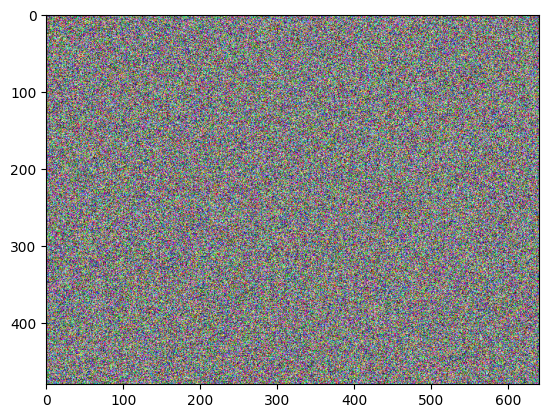

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im_shape= 480,640,3
im = (np.random.rand(*im_shape)*255).astype(np.uint8)
plt.imshow(im)
plt.show

# EP.2 - Computer Vision - Example : Flag of Thailand

<function matplotlib.pyplot.show(close=None, block=None)>

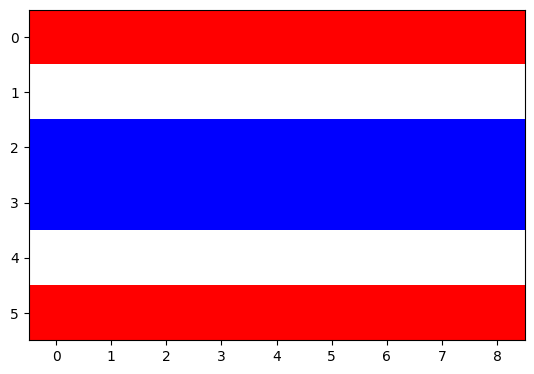

In [ ]:
Thai = np.ones((6,9,3)) #ขาว
Thai[[0,-1],:,1:]= 0
Thai[2:4,:,:2] = 0
plt.imshow(Thai)
plt.show

# EP.3 - Computer Vision - Example : Flag of Japan

<function matplotlib.pyplot.show(close=None, block=None)>

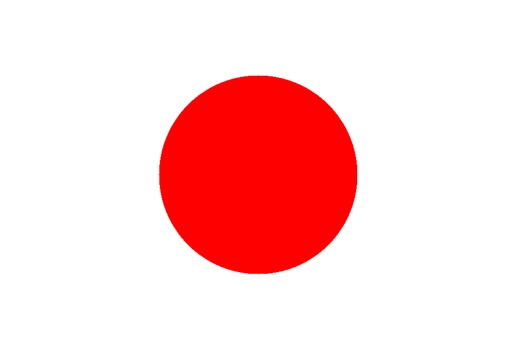

In [ ]:
Japan = np.ones((600,900,3)) #ขาว
r = 3/5/2 * Japan.shape[0]
c = [i//2 for i in Japan.shape[:2]]
for i in range(Japan.shape[0]):
  for j in range(Japan.shape[1]):
    if (i-c[0])**2 + (j-c[1])**2 <= r**2:
      Japan[i,j,1:] = 0
plt.imshow(Japan)
plt.axis('off')
plt.show

# EP.4 - Computer Vision - How to Import an Image and Color System

<function matplotlib.pyplot.show(close=None, block=None)>

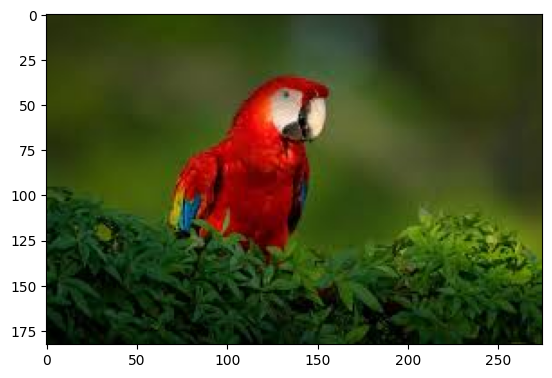

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread('/content/drive/MyDrive/LearningforIntern/super ai ss.5/computervision/image/parrot.jpg')
plt.imshow(im)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

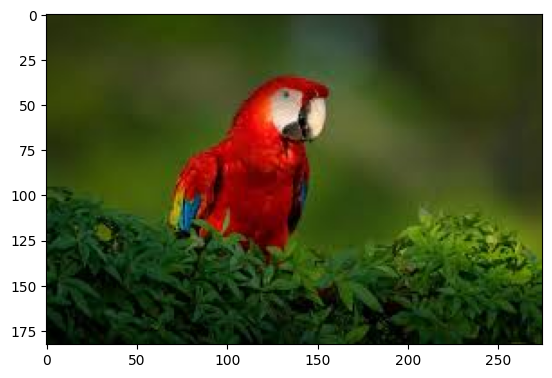

In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/LearningforIntern/super ai ss.5/computervision/image/parrot.jpg')
im = np.array(im)
plt.imshow(im)
plt.show

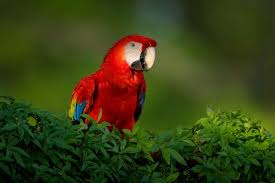

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

im = cv2.imread('/content/drive/MyDrive/LearningforIntern/super ai ss.5/computervision/image/parrot.jpg')
cv2_imshow(im) # Use cv2_imshow instead of cv2.imshow

# EP.5 - Computer Vision - How to Export an Image

## นำเข้าไลบรารีที่จำเป็น

In [1]:
import cv2
import numpy as np
from PIL import Image

In [3]:
Thai = np.ones((6,9,3))  # สร้างภาพขนาด 6x9 พิกเซล สีขาว (ค่า 1)
Thai[[0,-1],:,1:] = 0  # ทำให้แถวแรกและแถวสุดท้ายเป็นสีดำ (ยกเว้นช่องสีแดง)
Thai[2:4,:,:2] = 0  # ทำให้แถวที่ 2-3 คอลัมน์แรกเป็นสีดำ (ลดเฉพาะช่องสีแดง-เขียว)

# แปลงค่าเป็นช่วง 0-255 เพื่อใช้กับ OpenCV/Pillow
Thai_uint8 = np.uint8(Thai * 255)

In [4]:
cv2.imwrite('Thai.png', Thai_uint8[:, :, ::-1])  # ต้องกลับลำดับช่องสี BGR → RGB

True

In [5]:
im = Image.fromarray(Thai_uint8)
im.save('Thai.jpg')

In [6]:
im2 = Image.fromarray(np.uint8(255 - Thai_uint8))  # อินเวิร์สสีของภาพเดิม
im.save('Thai.gif', save_all=True, append_images=[im2, im]*20)  # ทำ GIF 20 เฟรม

# EP.6 - Computer Vision - Resolutions

เป็นการเรียนเรื่อง Bit plane ตัดดส่วนที่ไม่สำคัญของภาพแล้วทำให้เป็นส่วนเดียวกัน เช่น ภาพคนที่ยืนท่ามกลางดอกทานตะวัน โดยฉากข้าหลังเป็นทุ่งดอกทานตะวัน แล้วก็นำสีทุ่งดอกทานตะวันมาทำการ Bit plane จึงจะได้ภาพที่ต้องการ

# EP.7 - Computer Vision - How to Create and Import a Video

## นำเข้าไลบรารี่ที่จำเป็น

In [7]:
import cv2
import numpy as np

## กำหนดตัวแปลงโค้ดวิดีโอ

In [8]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

## กำหนดขนาดเฟรมของวิดีโอ
กำหนดขนาดของเฟรม (รูปภาพแต่ละเฟรมของวิดีโอ)
(480, 640, 3) หมายถึง สูง 480 พิกเซล, กว้าง 640 พิกเซล, 3 ช่องสี (RGB)

In [9]:
frame_size = (480, 640, 3)

## สร้าง VideoWriter สำหรับบันทึกวิดีโอ

In [10]:
vdo_writer = cv2.VideoWriter('out.mp4', fourcc, 30, (frame_size[1], frame_size[0]))

## วนลูปสร้างเฟรมและเพิ่มวงกลมเคลื่อนที่

In [11]:
for i in range(640):  # วนลูป 640 ครั้ง (เฟรมของวิดีโอ)
    frame = np.zeros(frame_size, np.uint8)  # สร้างภาพสีดำ
    cv2.circle(frame, (i, 200), 20, (255,255,255), -1)  # วาดวงกลมสีขาว
    vdo_writer.write(frame)  # บันทึกเฟรมลงวิดีโอ
vdo_writer.release()


## การ Import Video เข้ามา

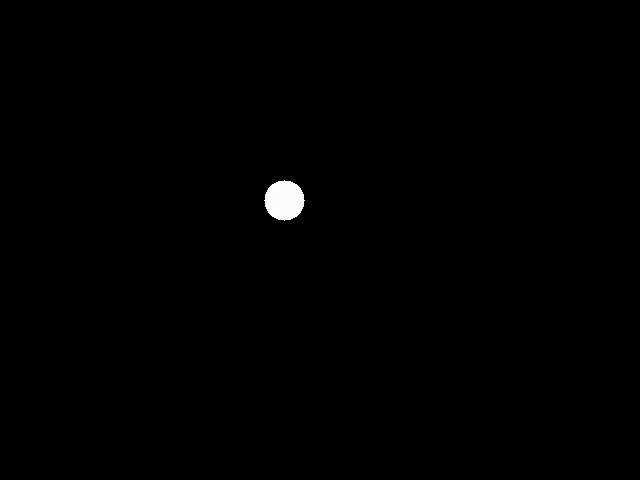

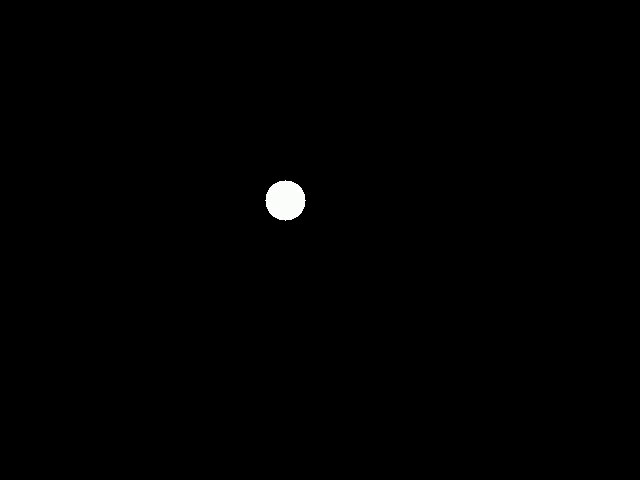

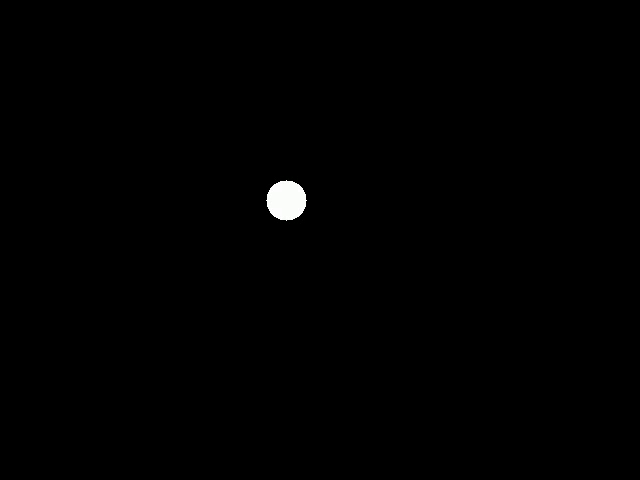

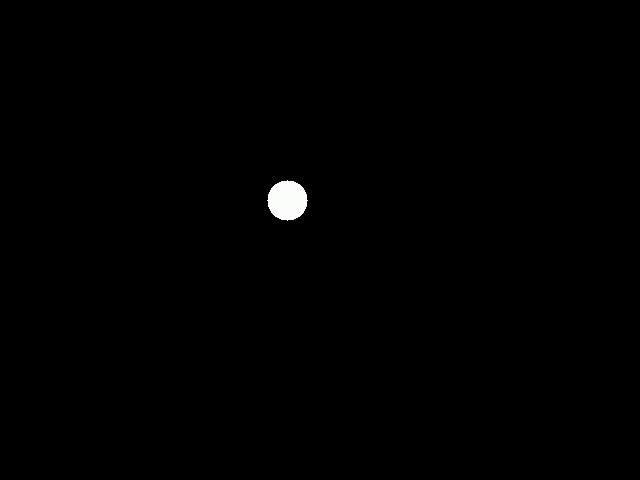

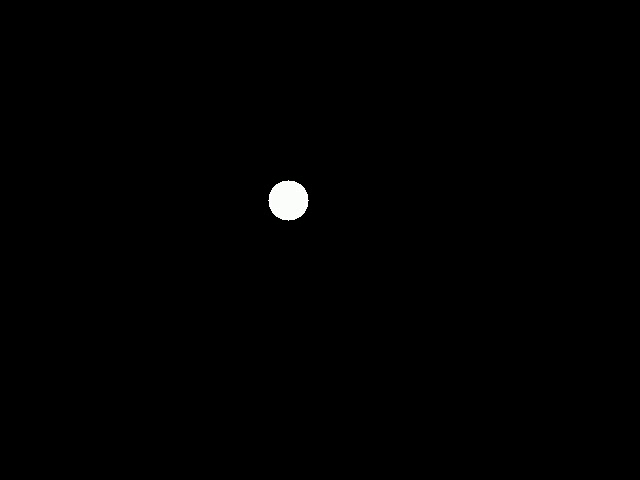

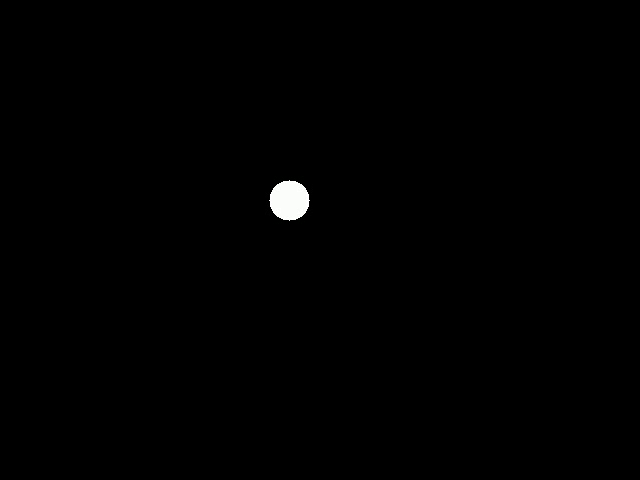

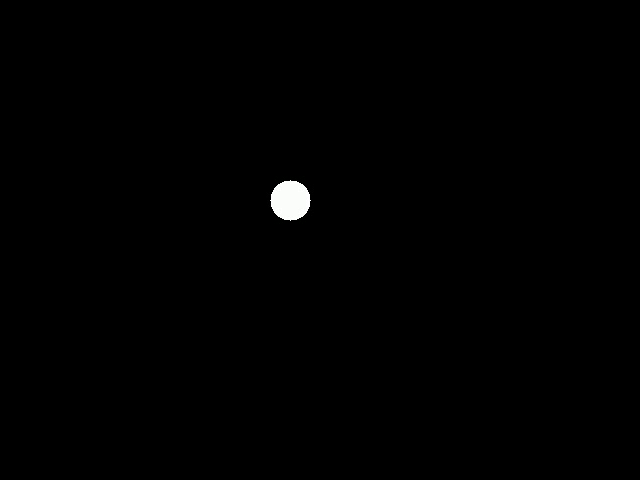

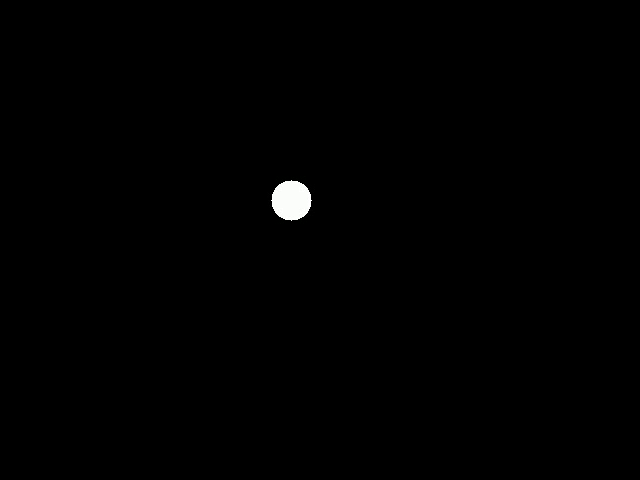

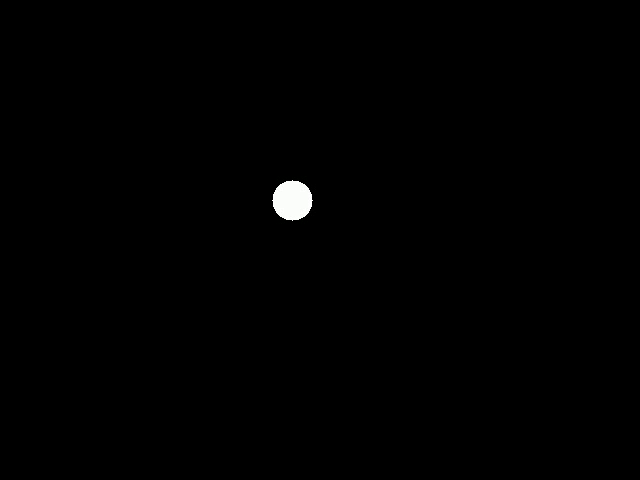

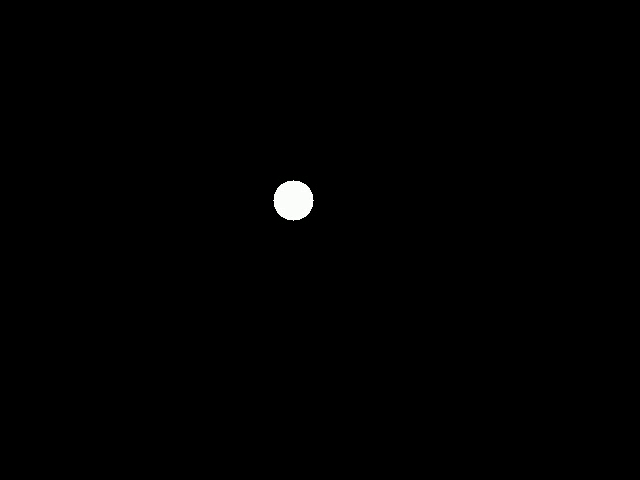

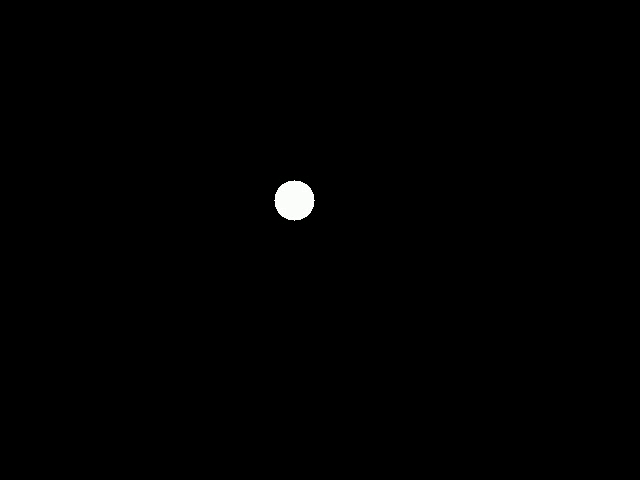

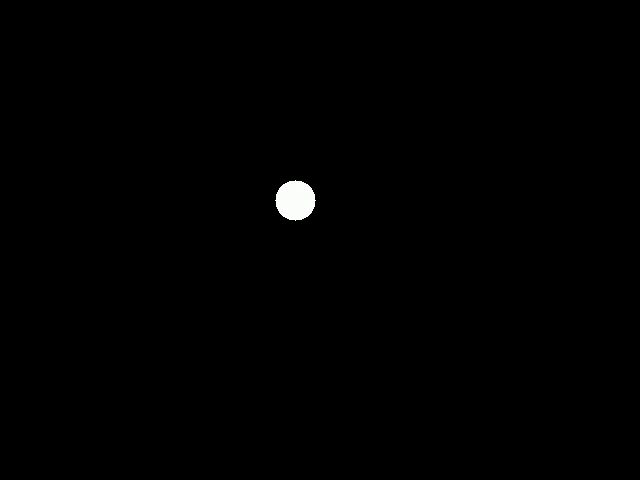

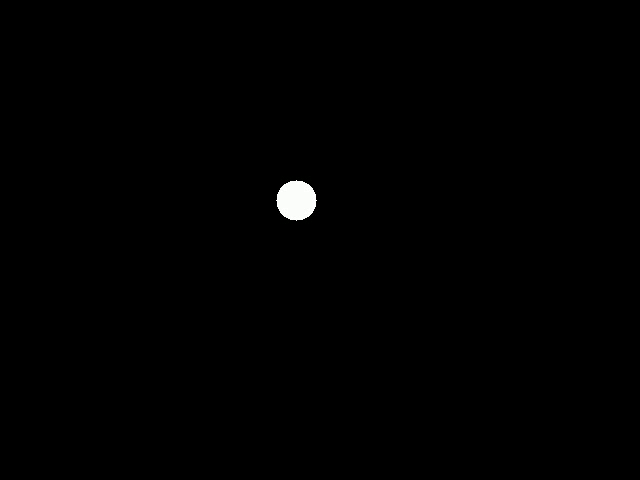

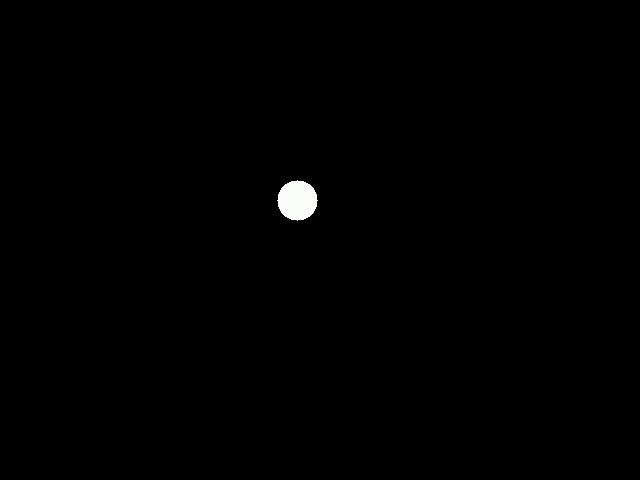

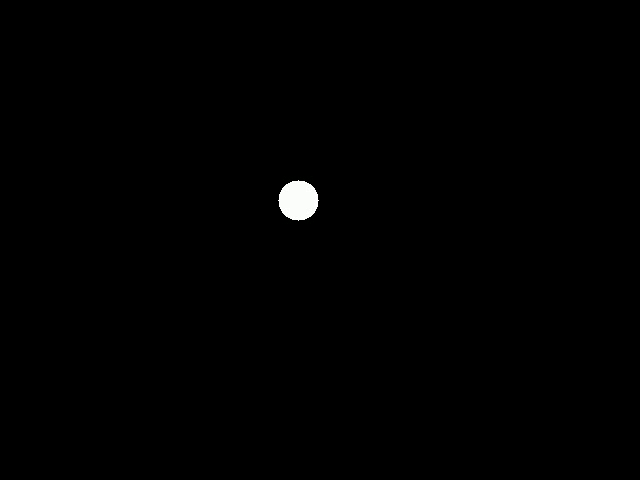

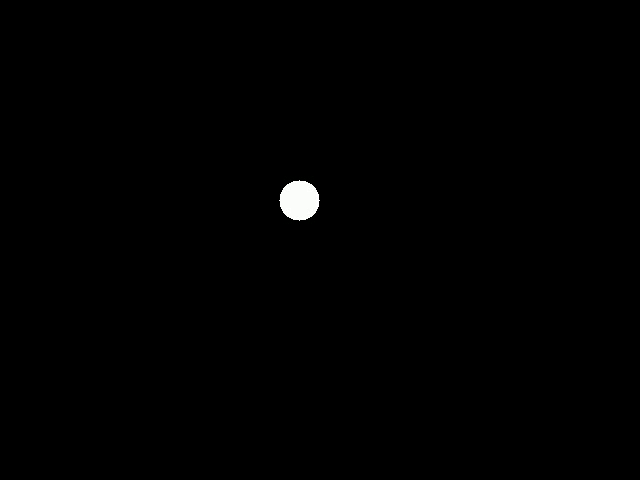

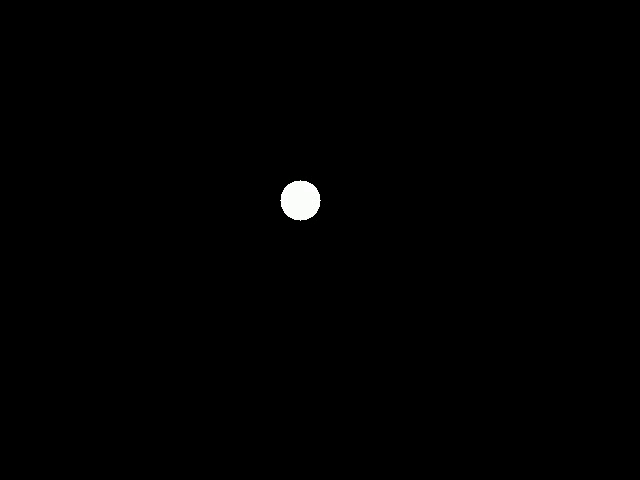

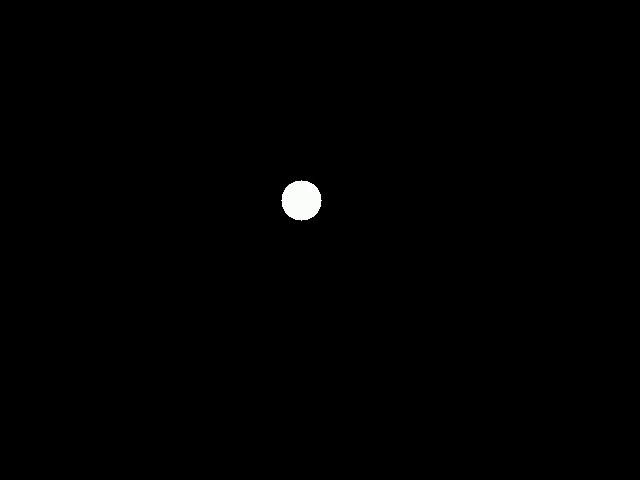

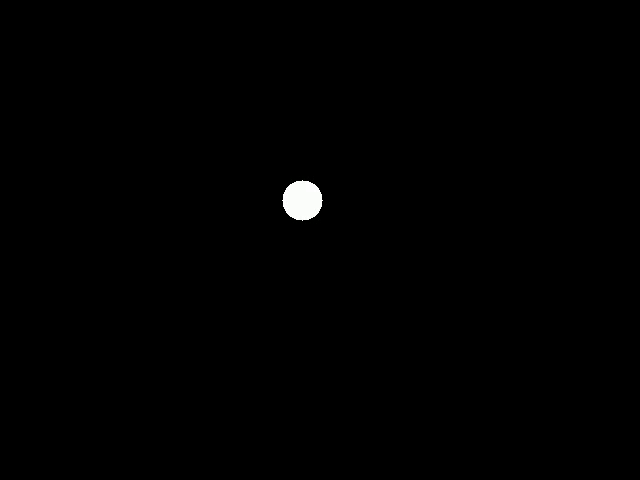

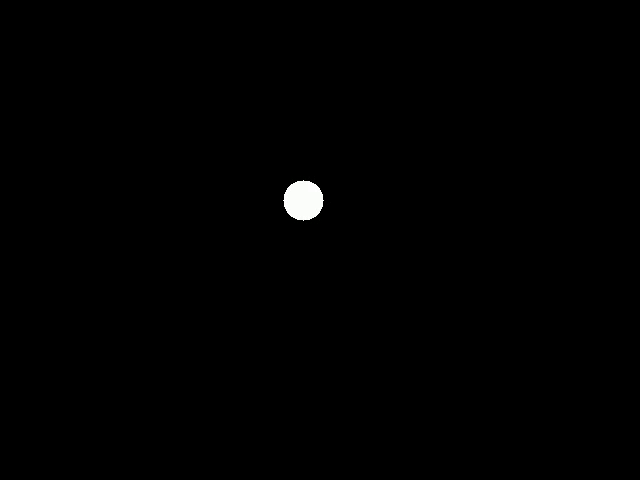

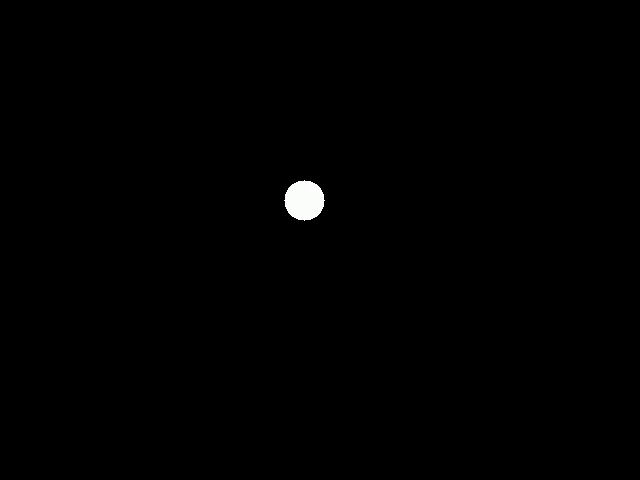

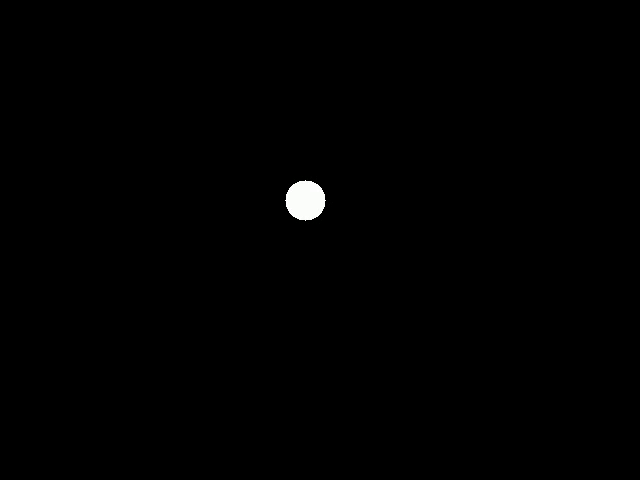

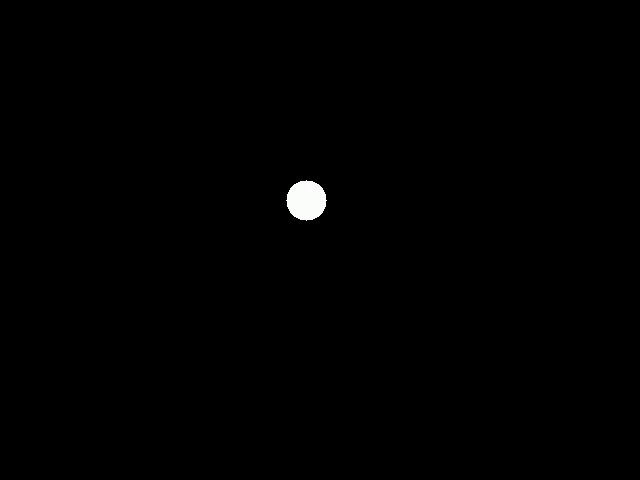

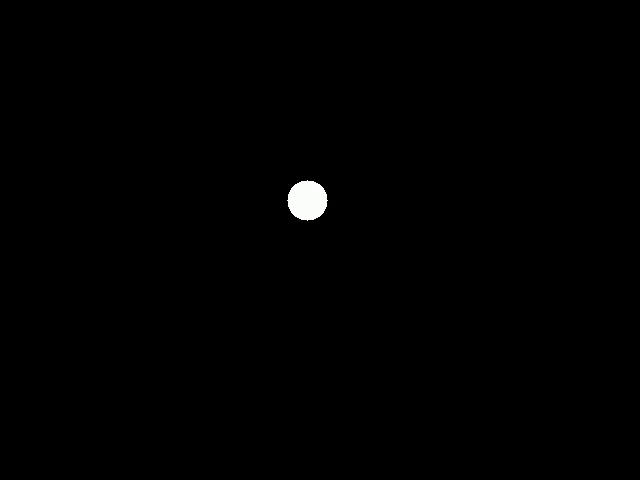

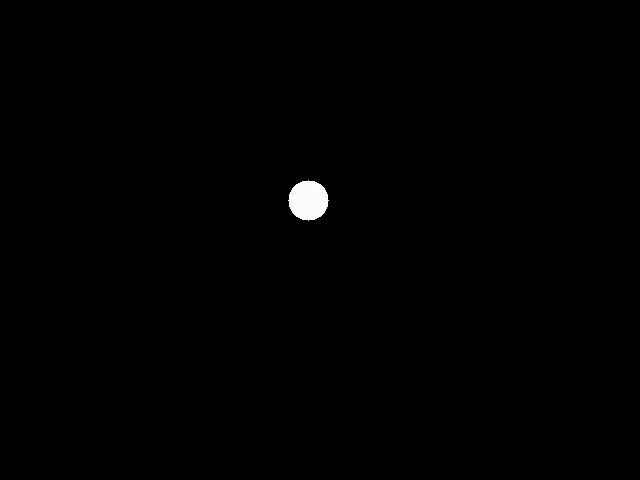

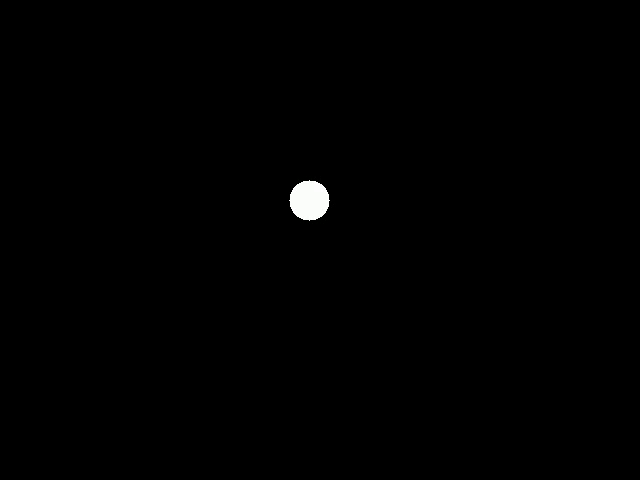

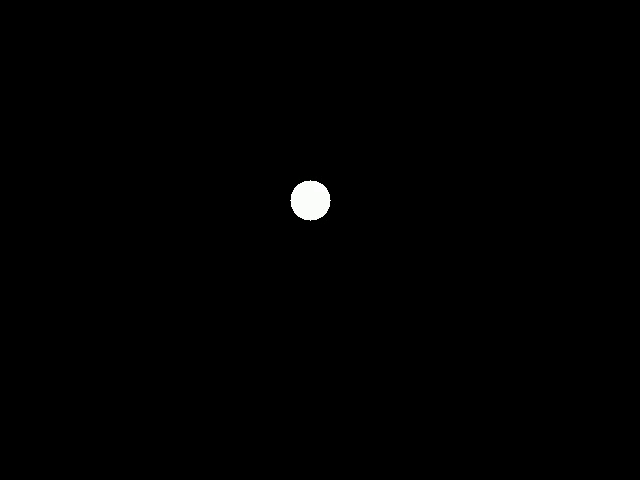

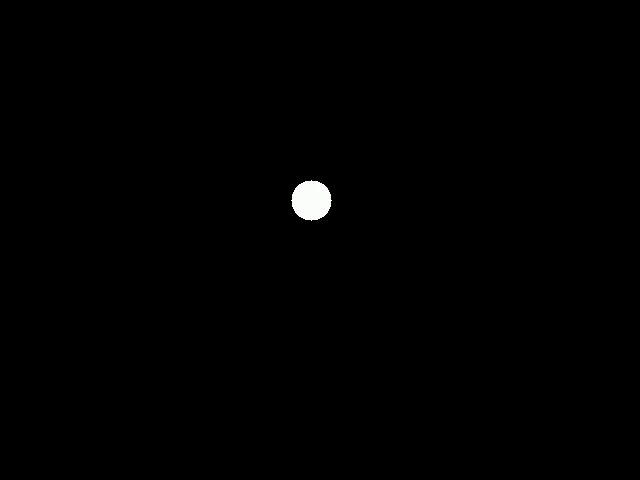

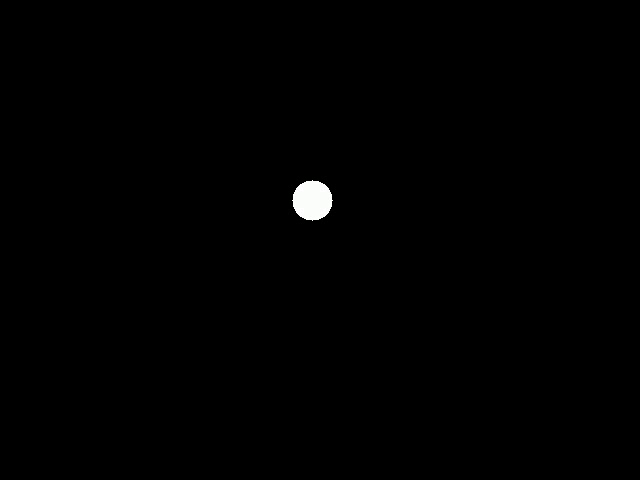

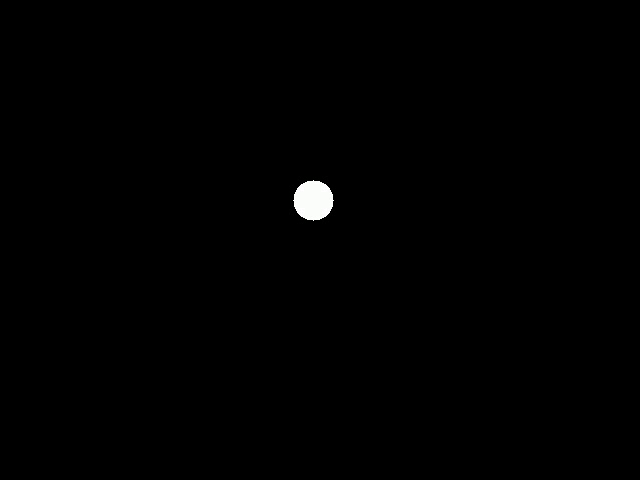

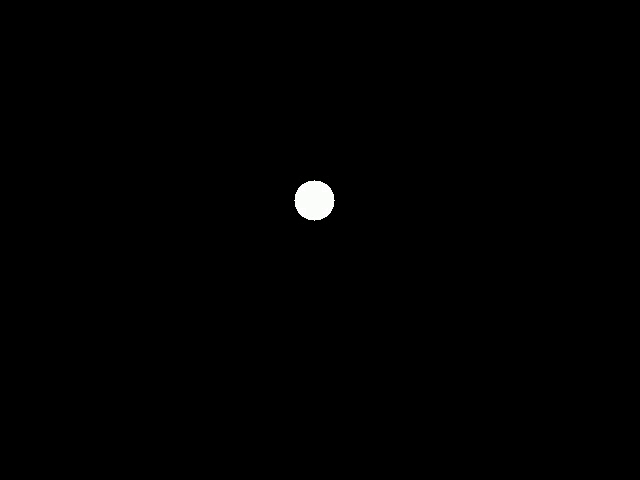

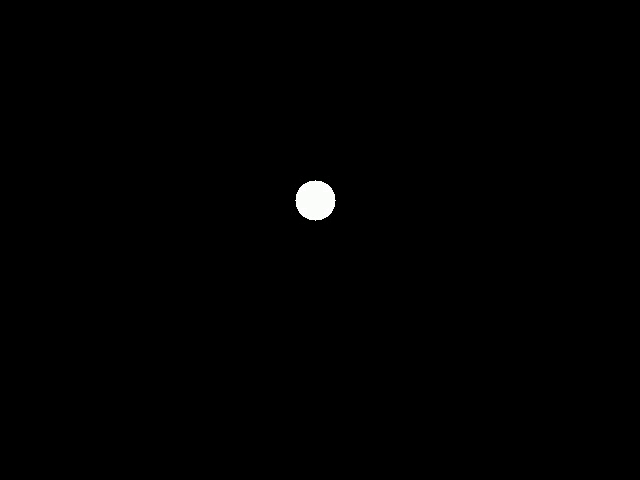

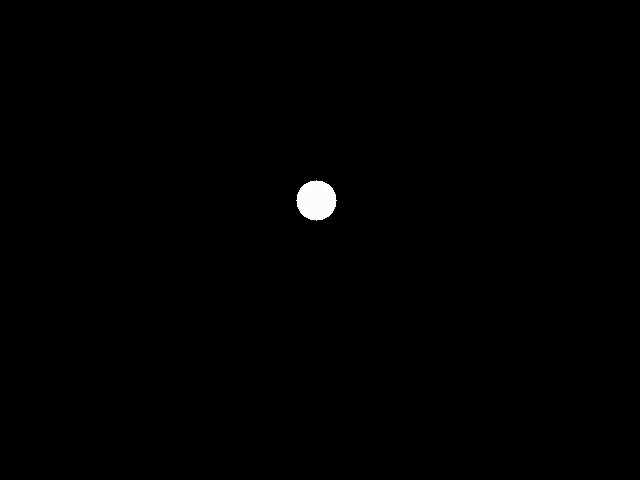

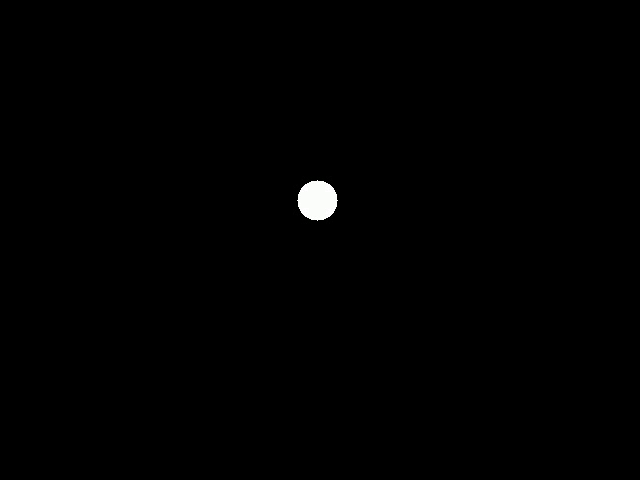

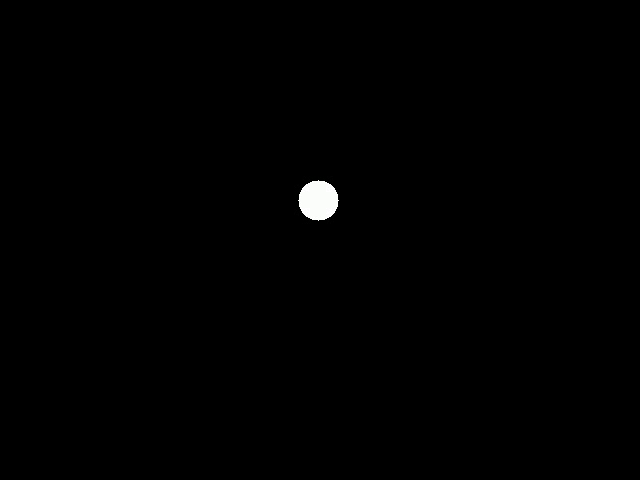

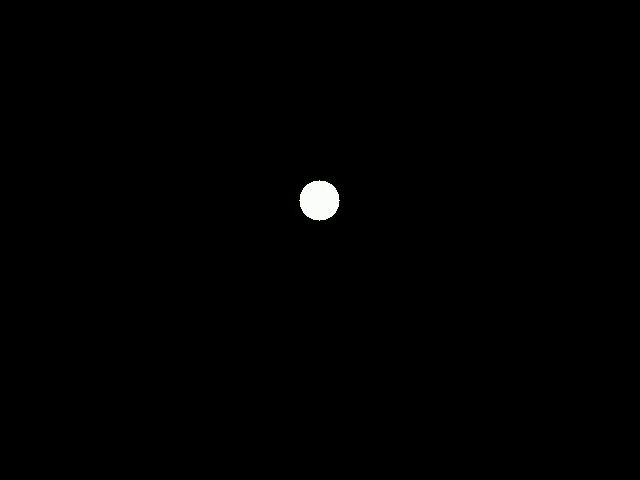

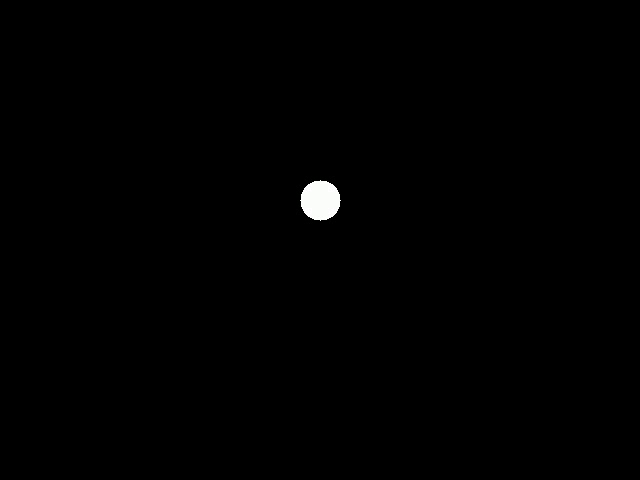

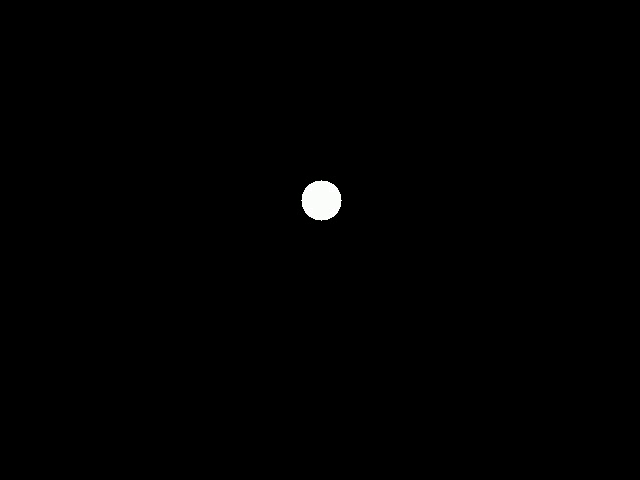

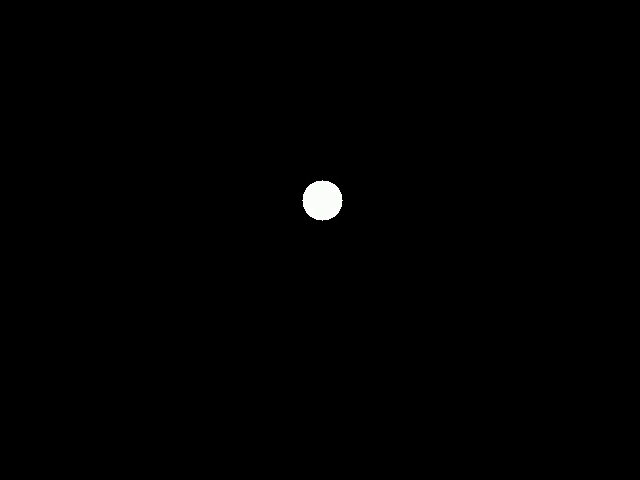

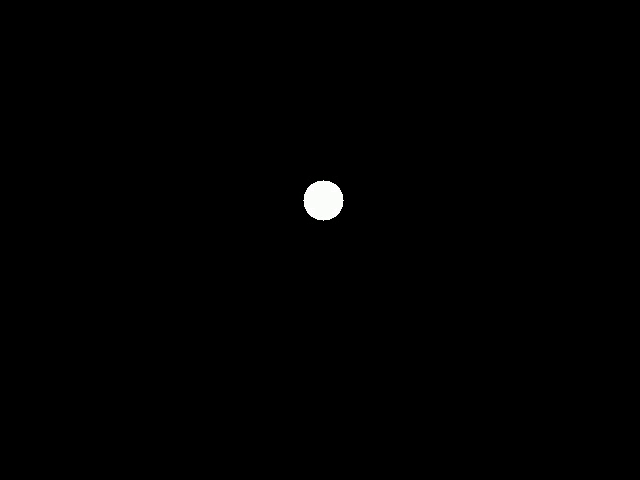

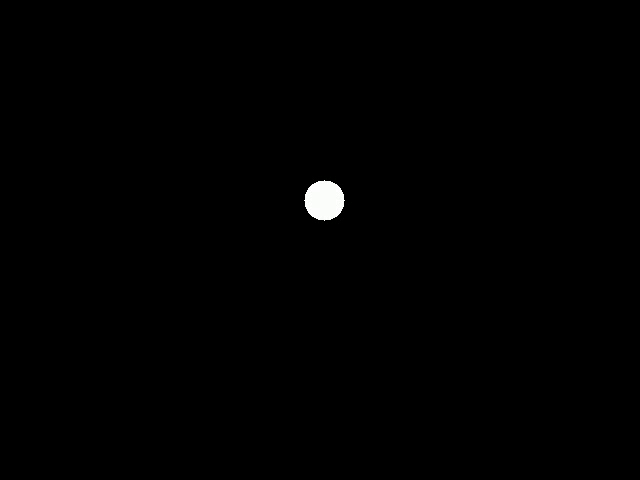

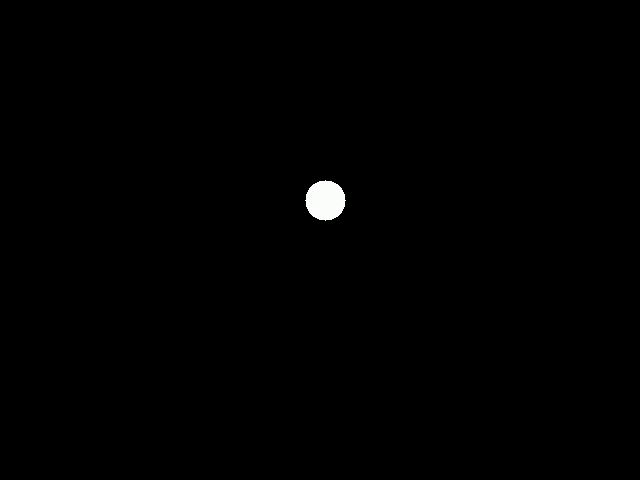

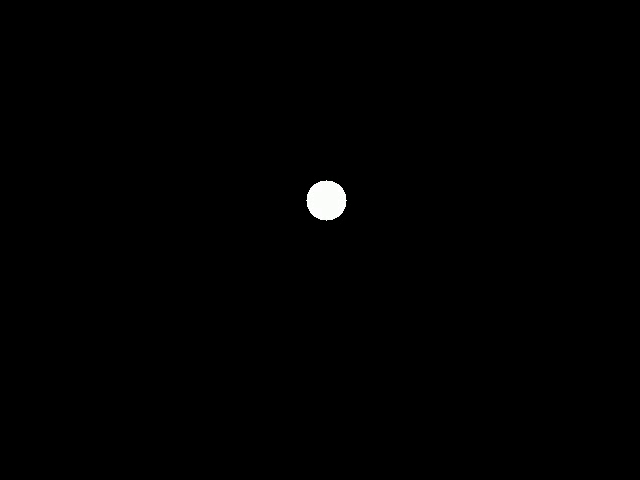

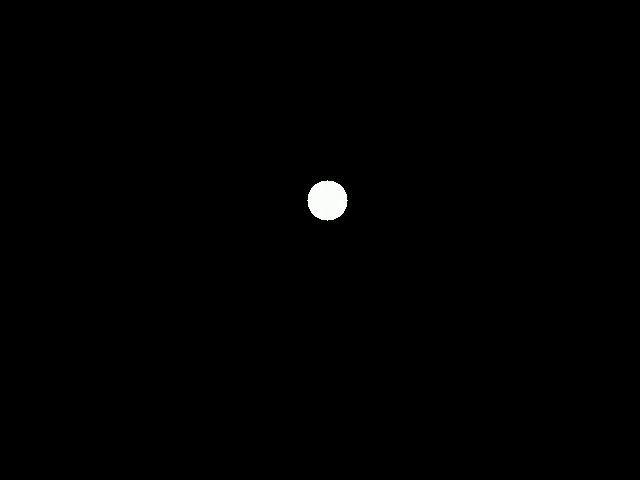

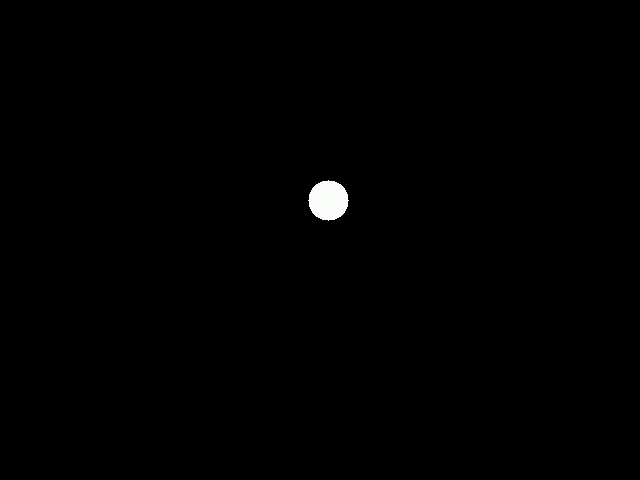

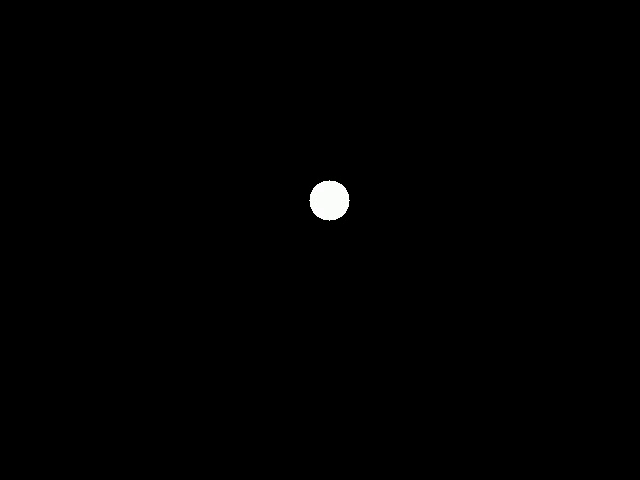

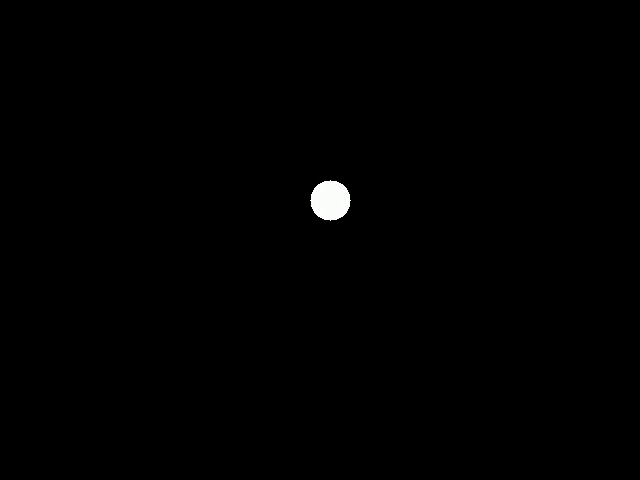

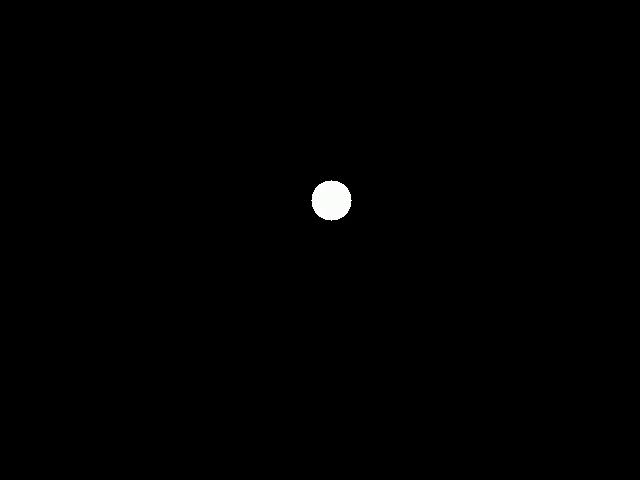

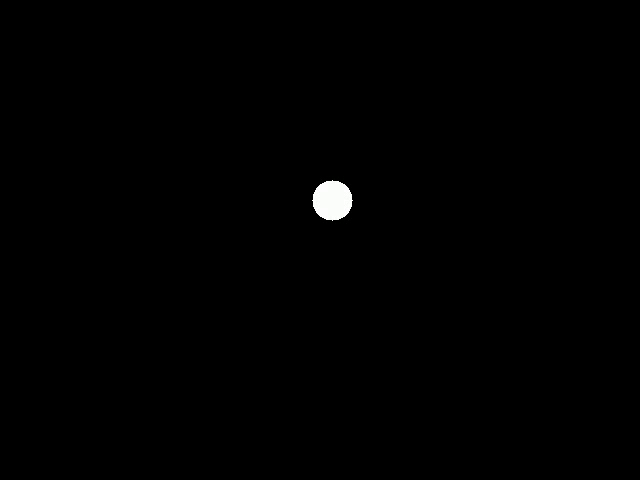

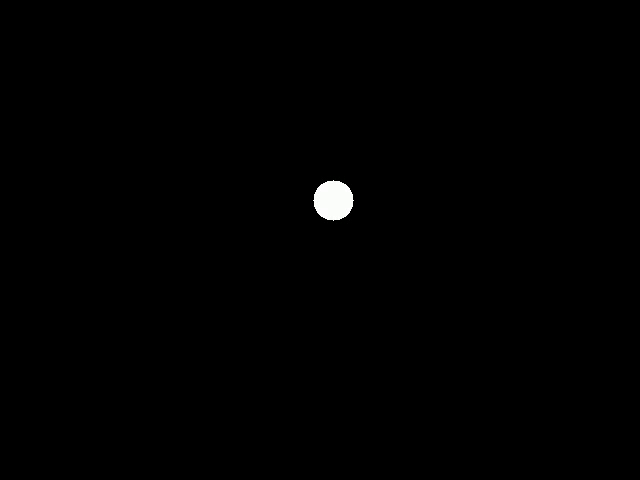

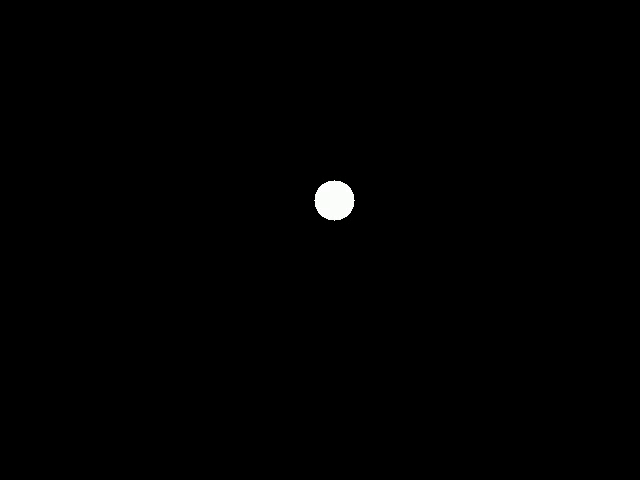

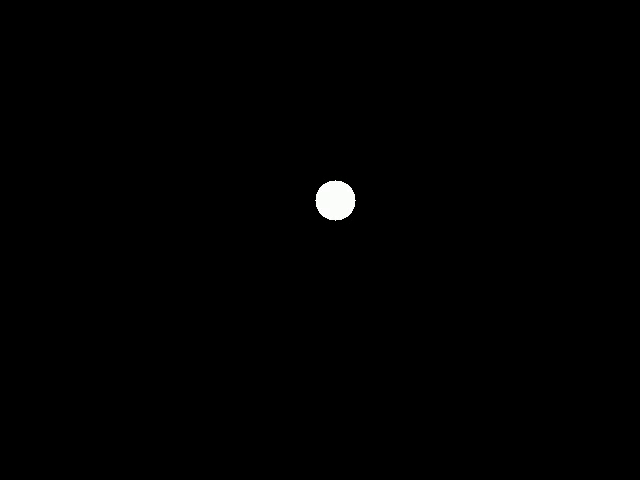

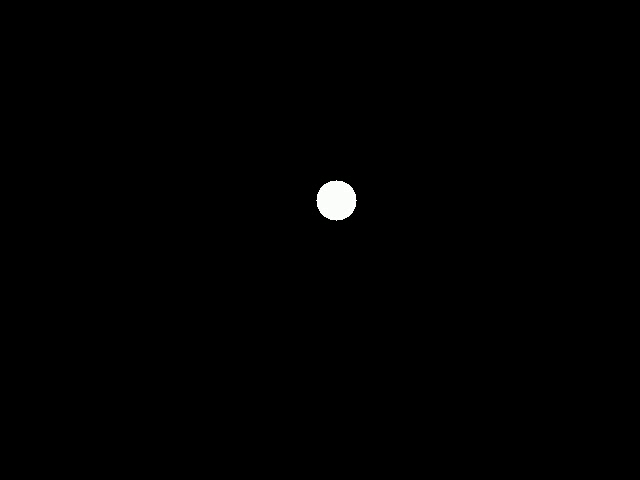

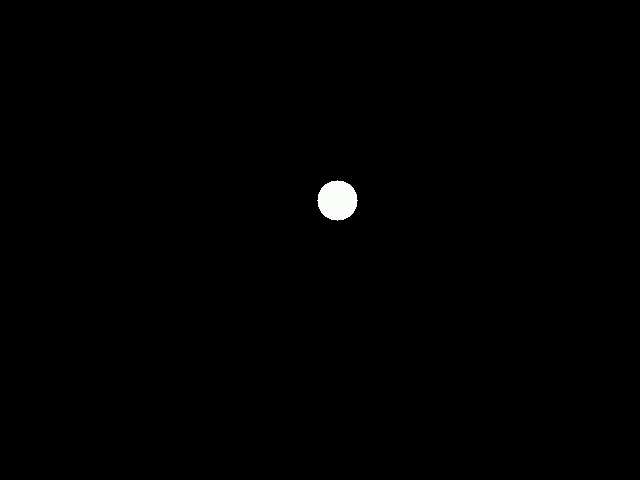

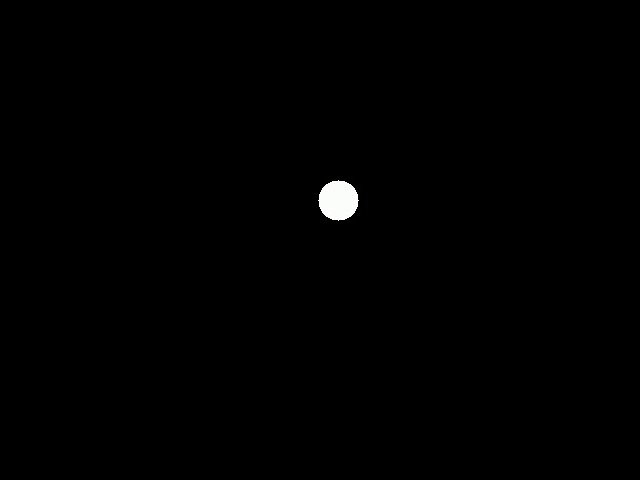

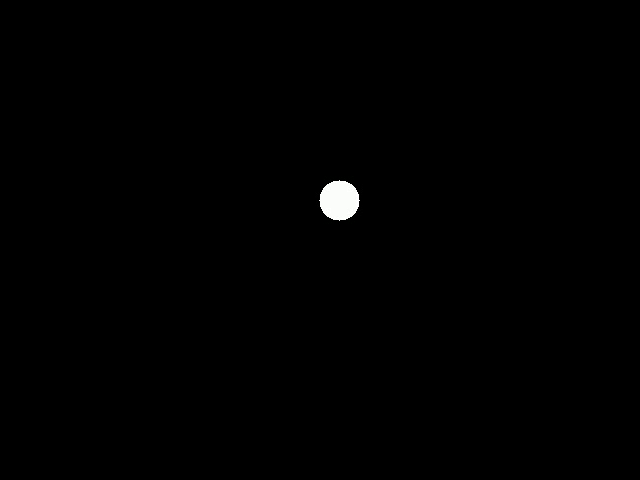

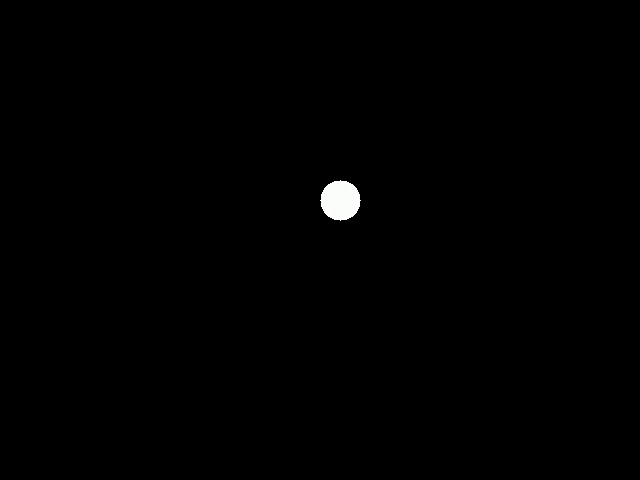

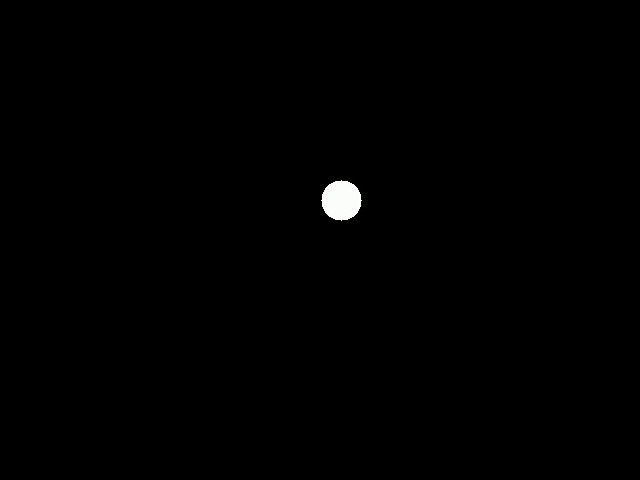

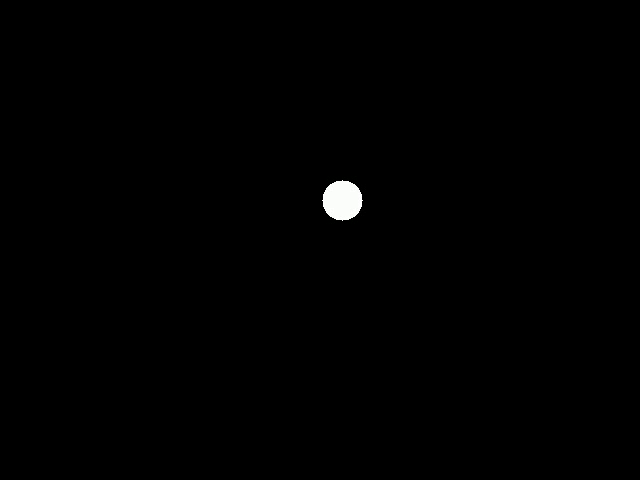

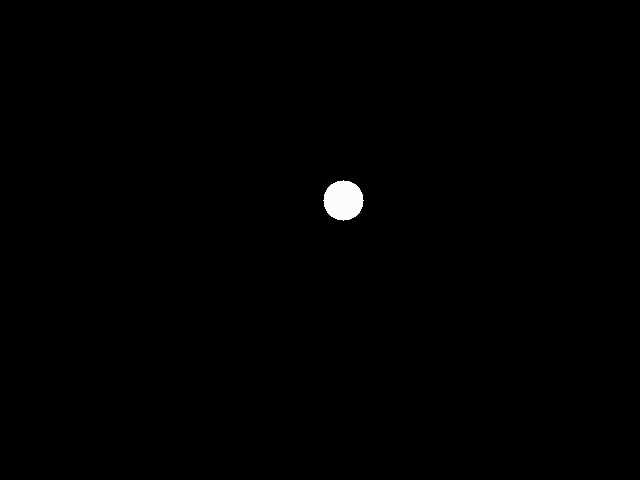

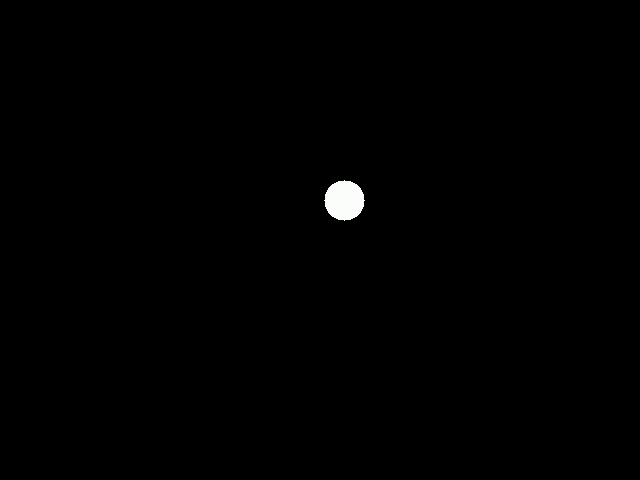

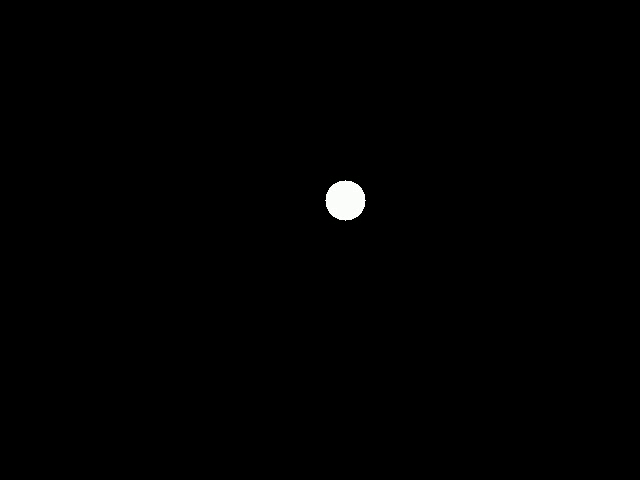

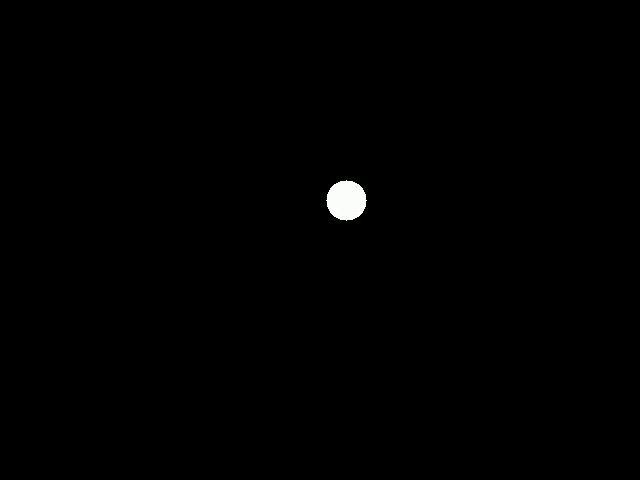

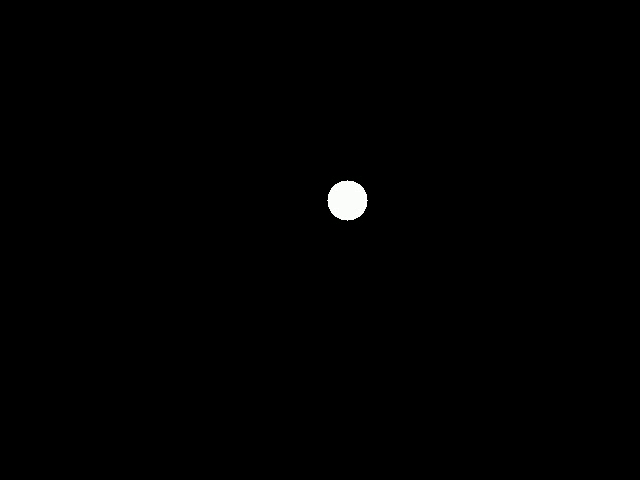

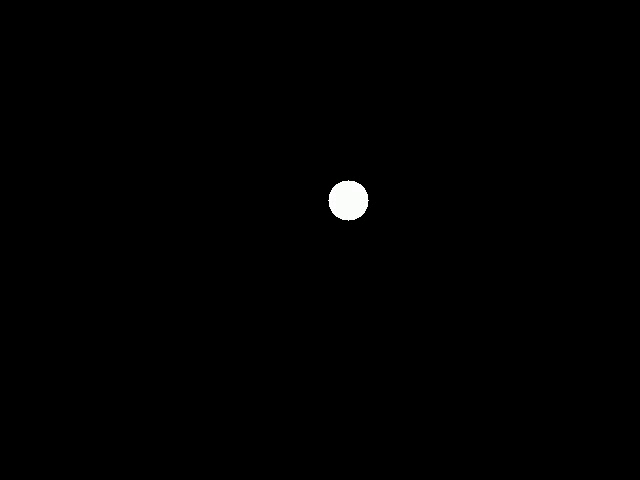

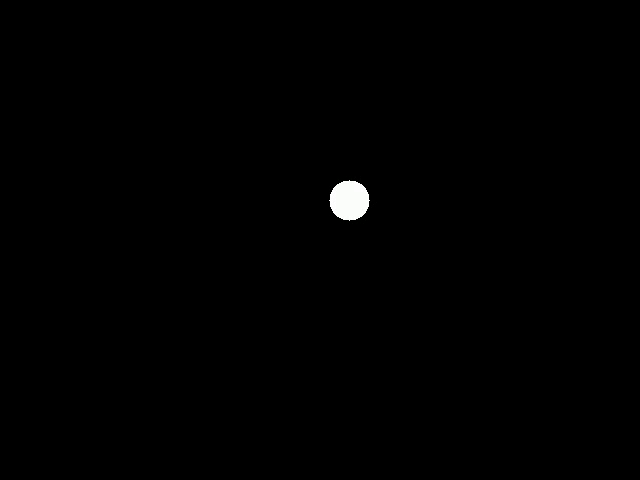

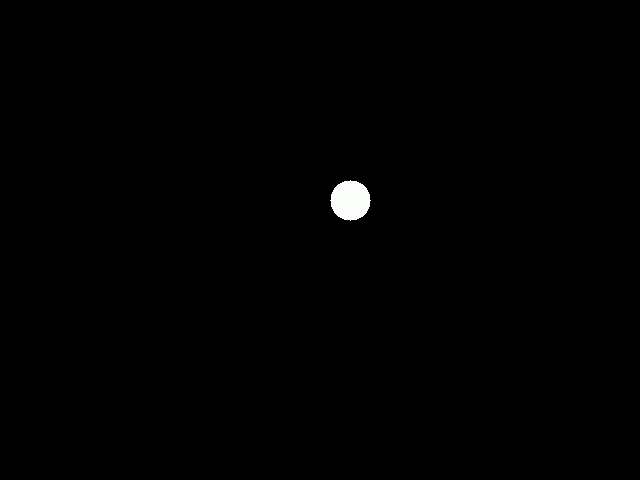

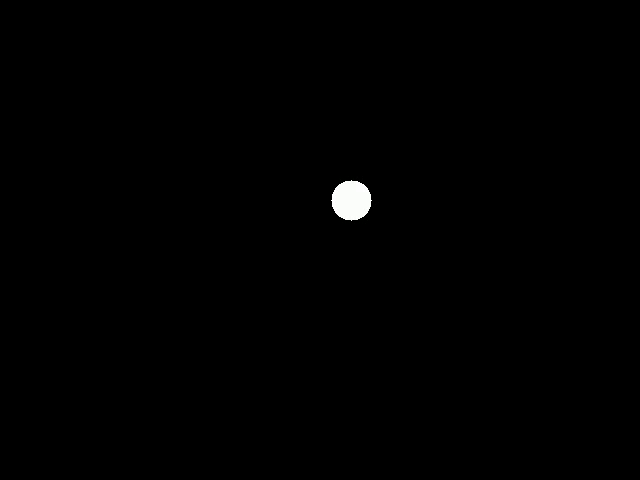

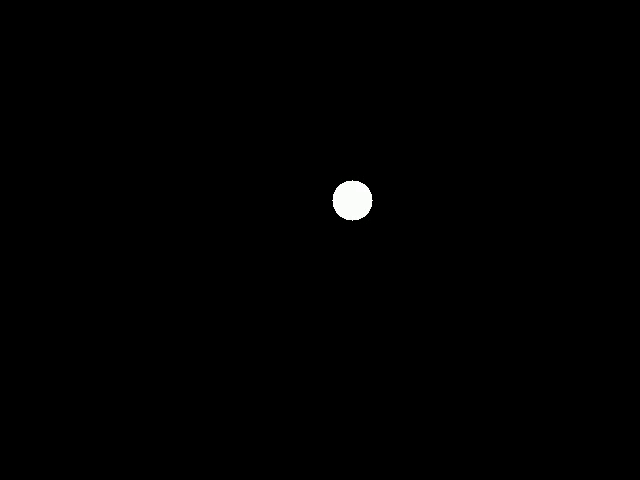

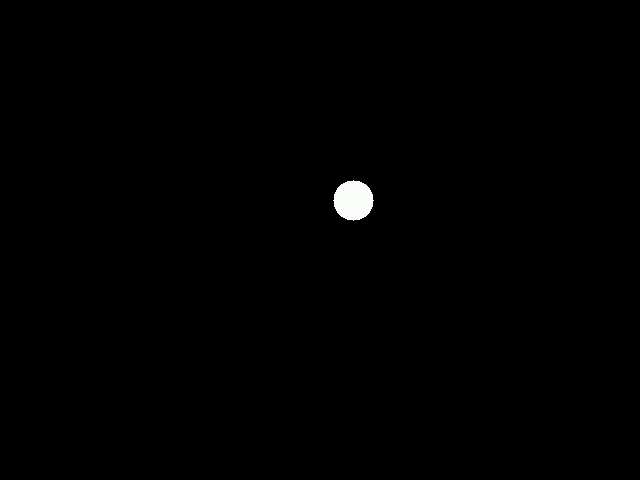

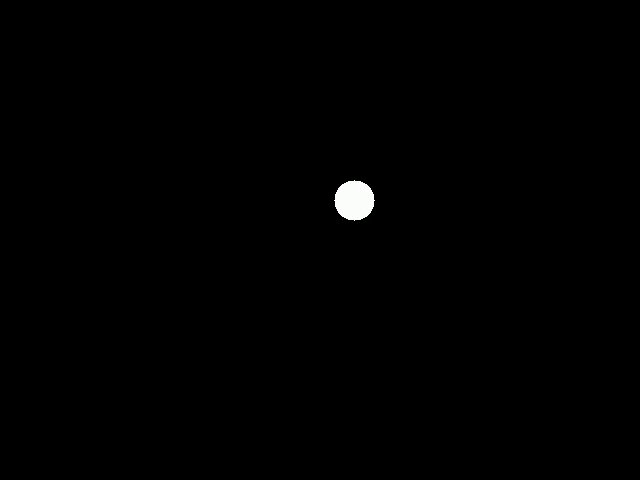

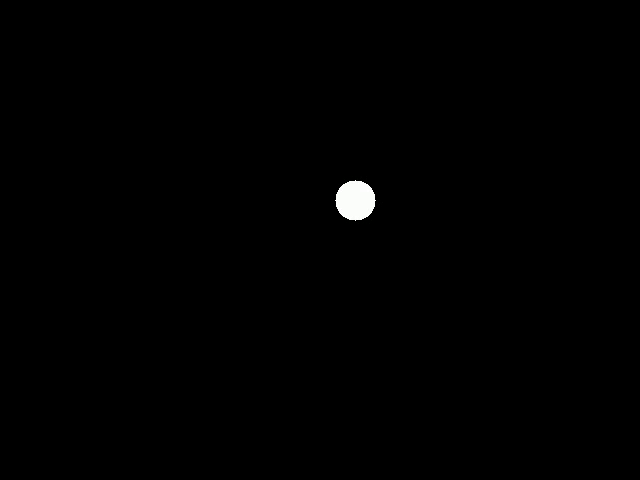

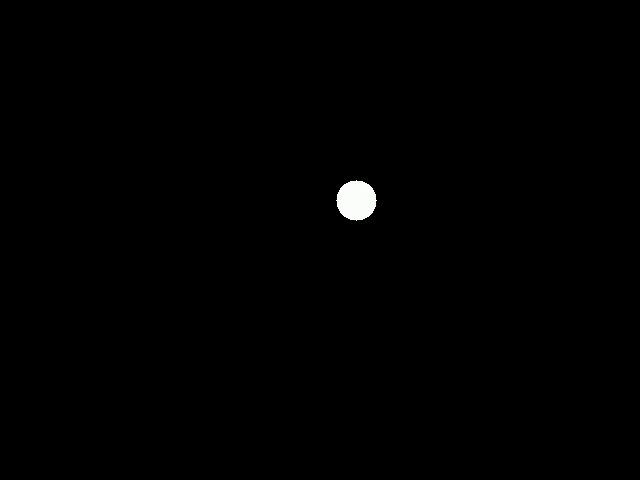

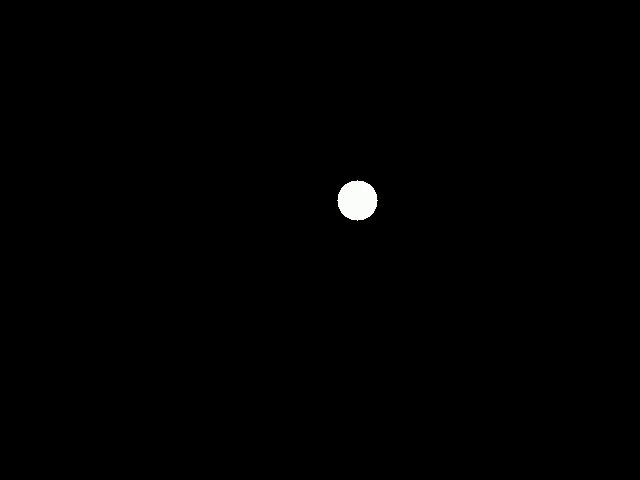

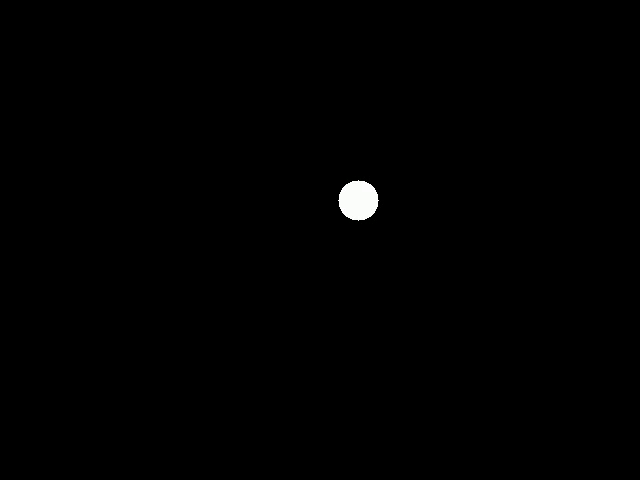

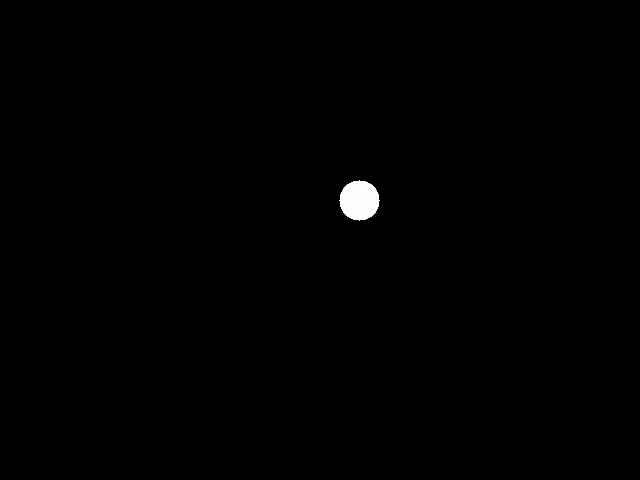

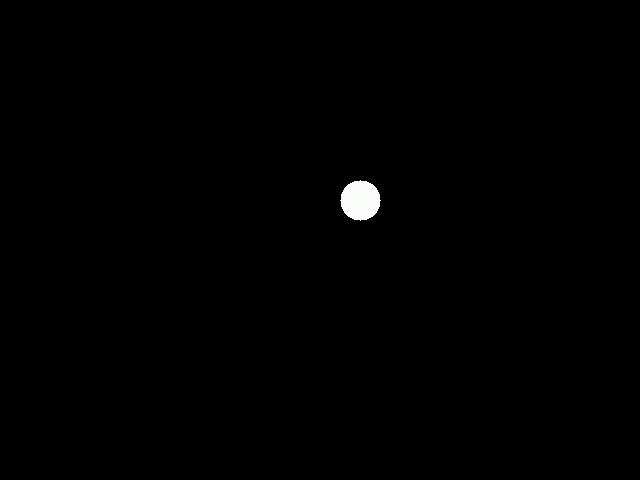

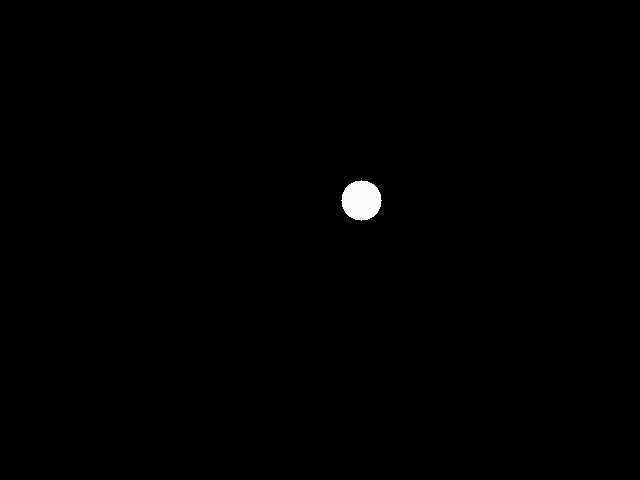

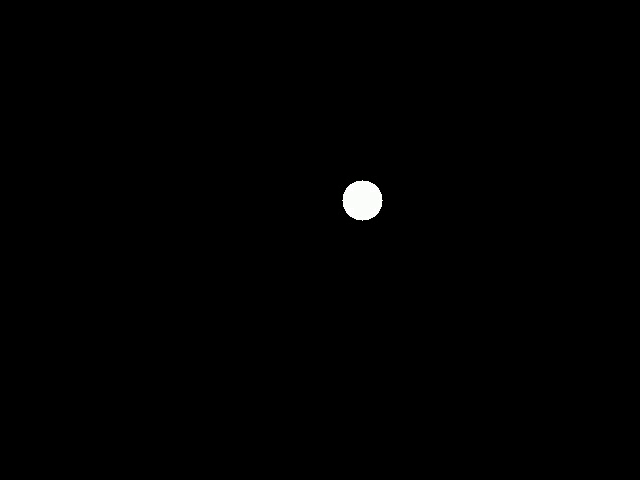

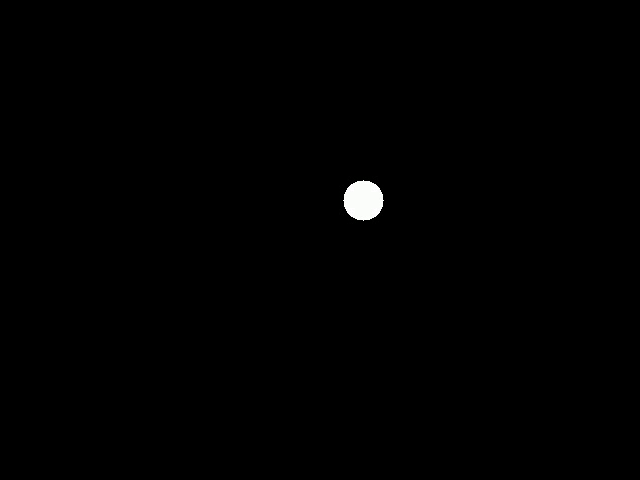

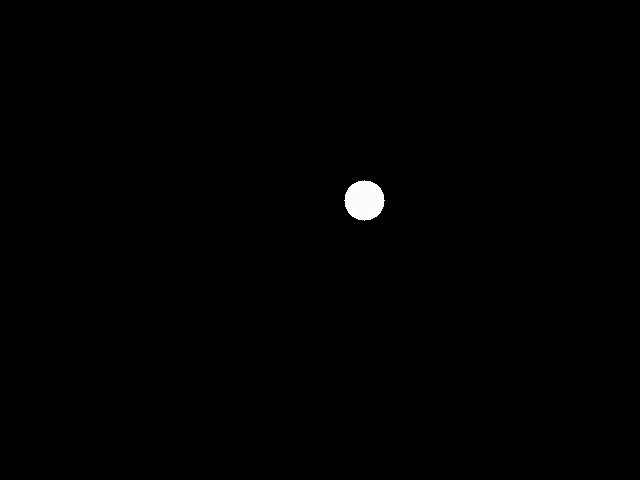

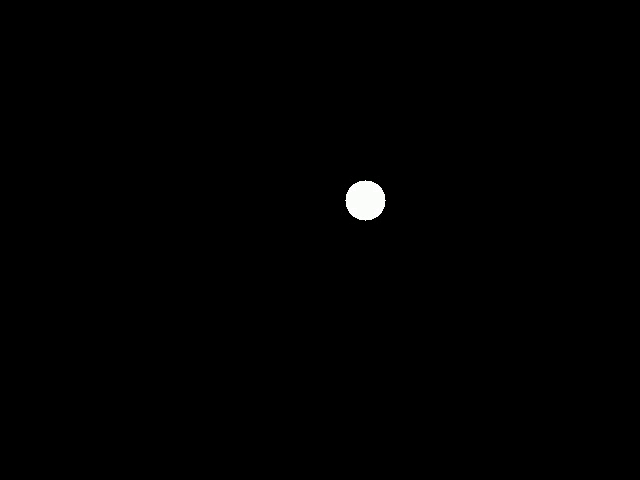

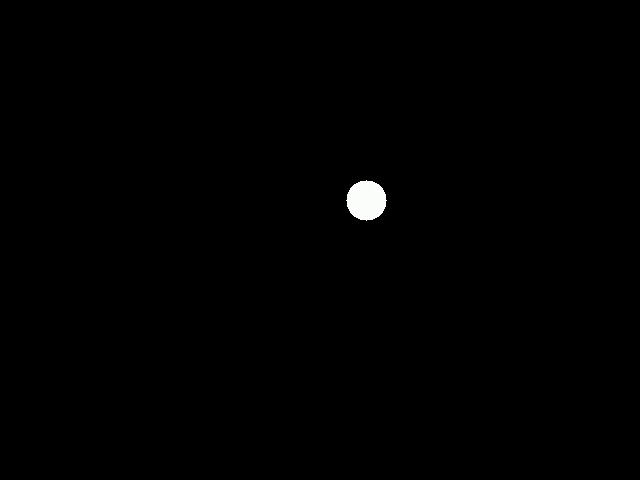

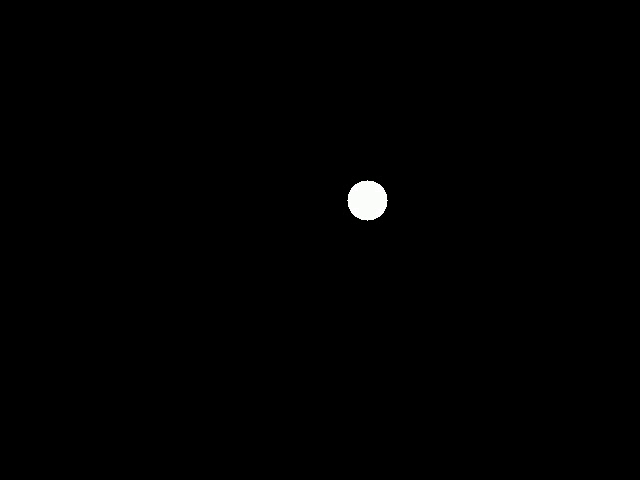

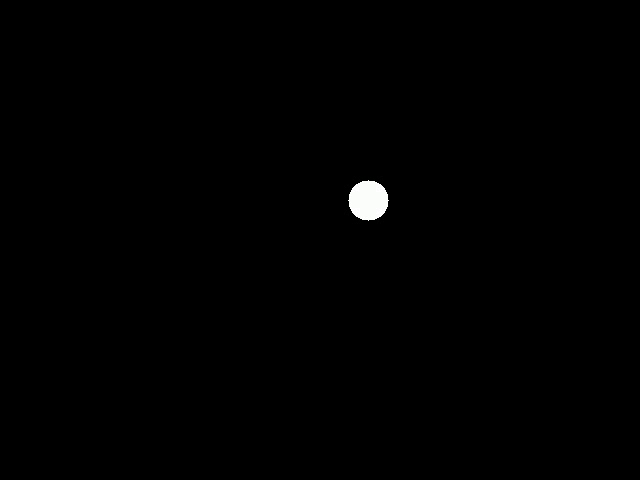

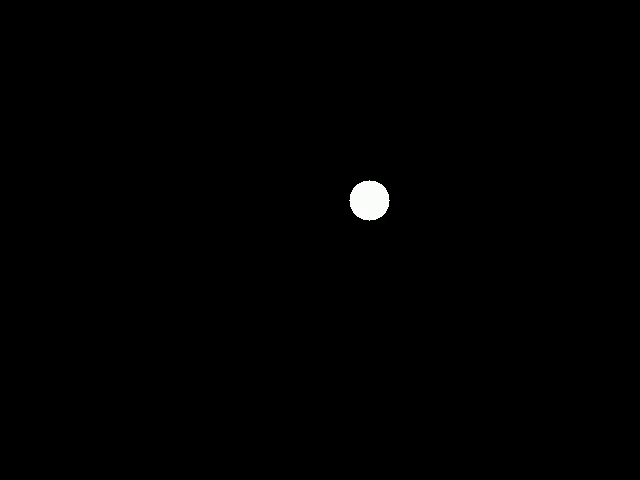

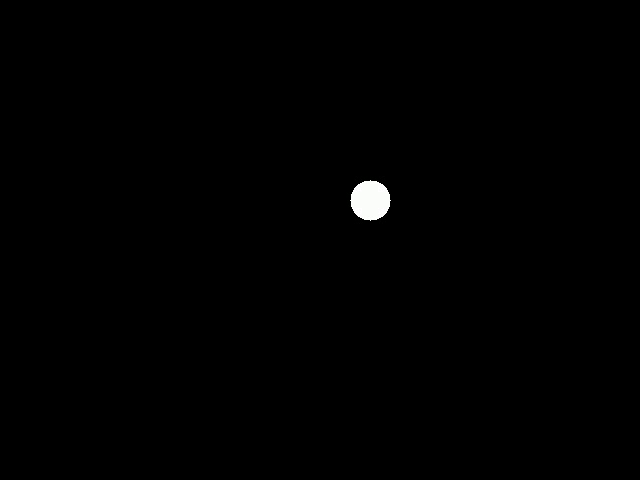

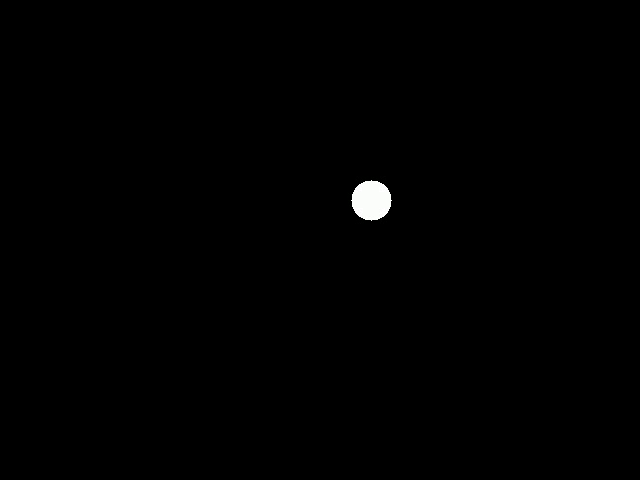

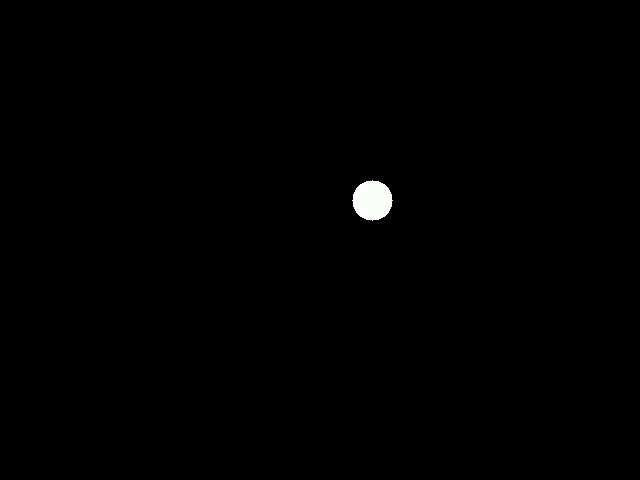

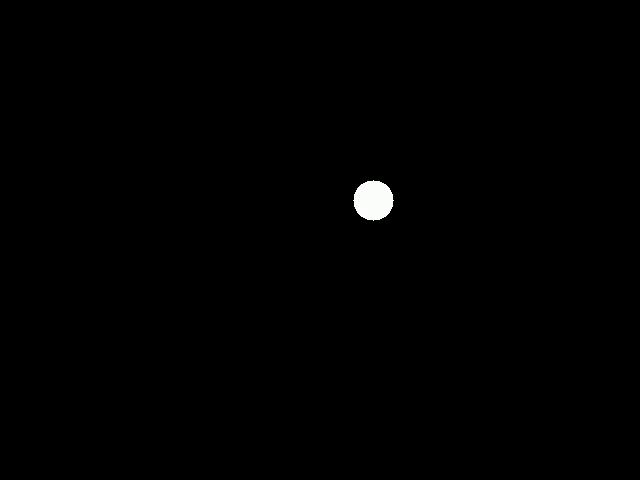

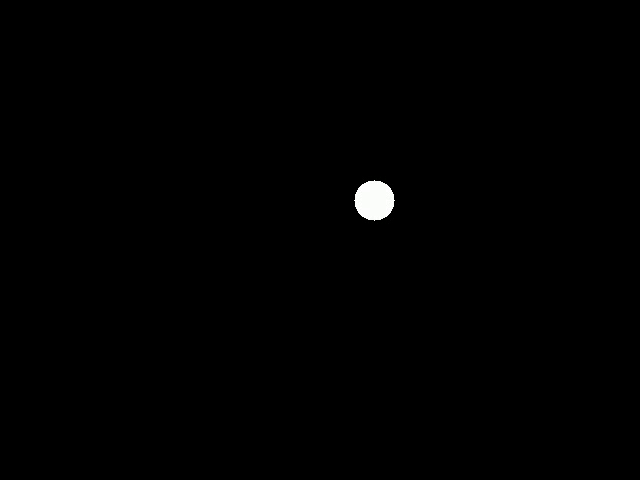

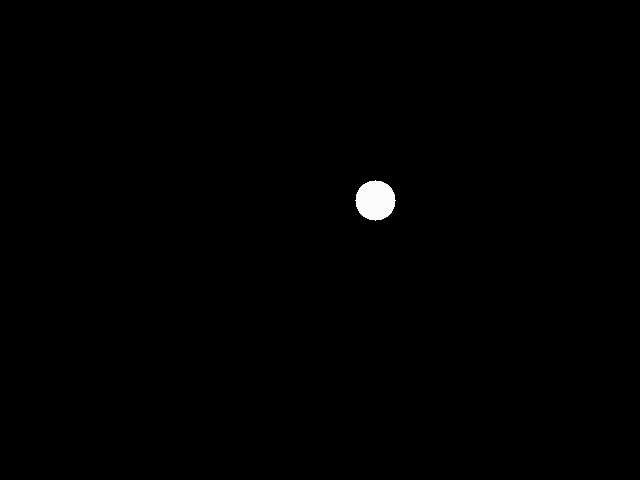

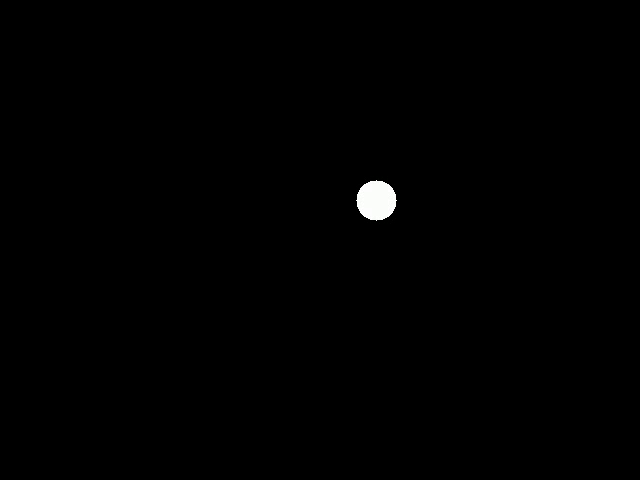

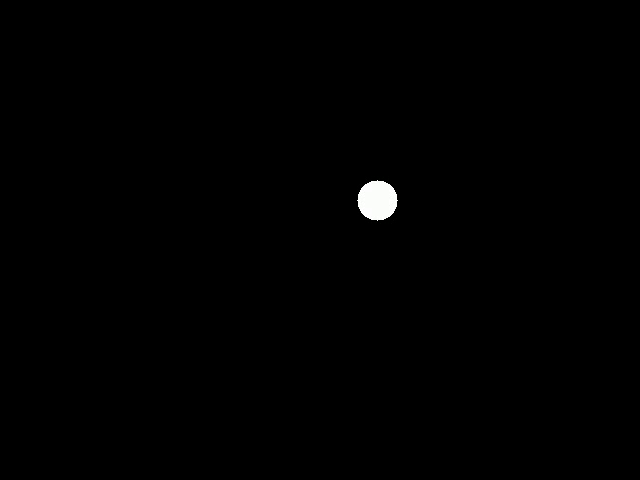

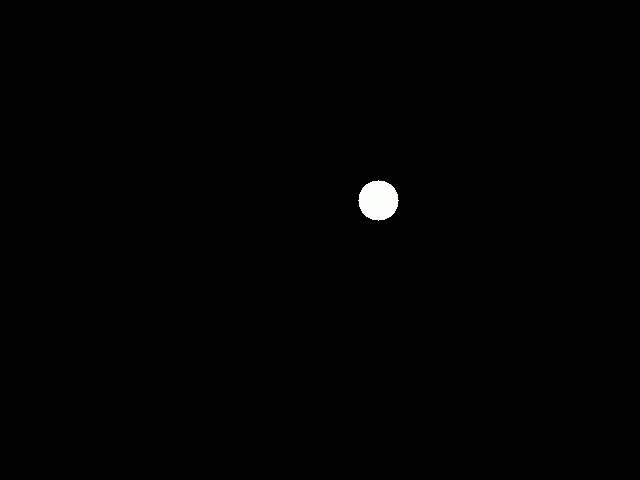

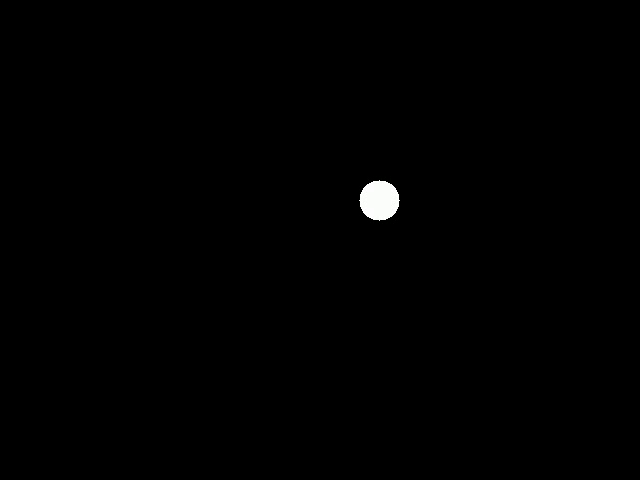

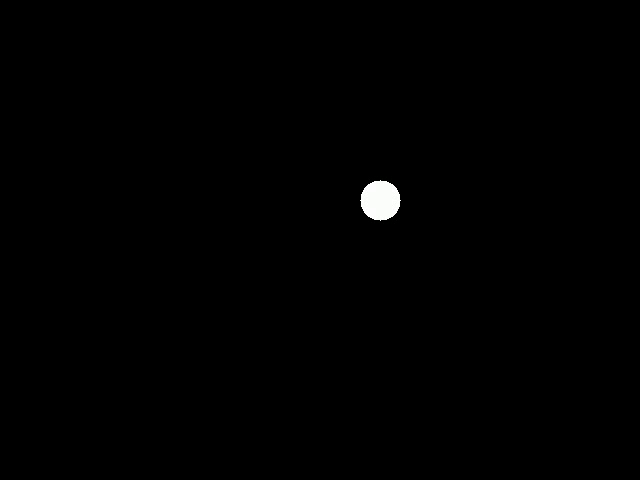

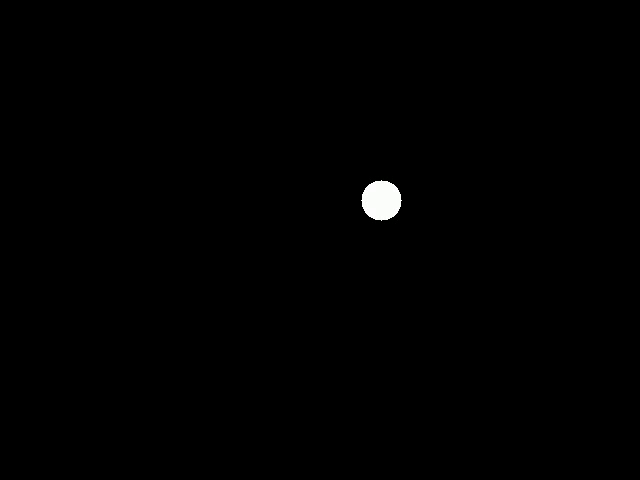

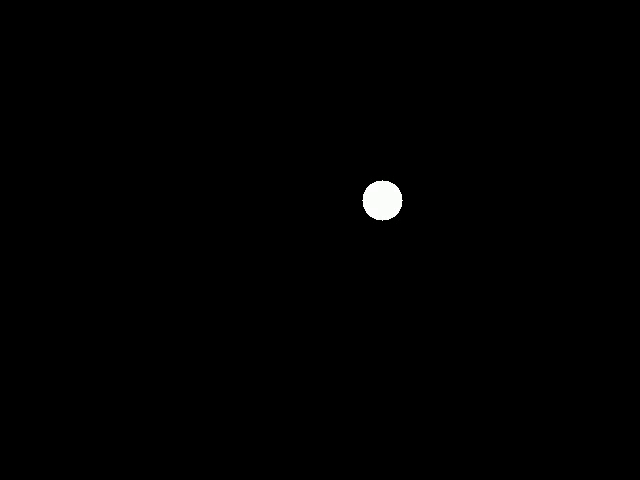

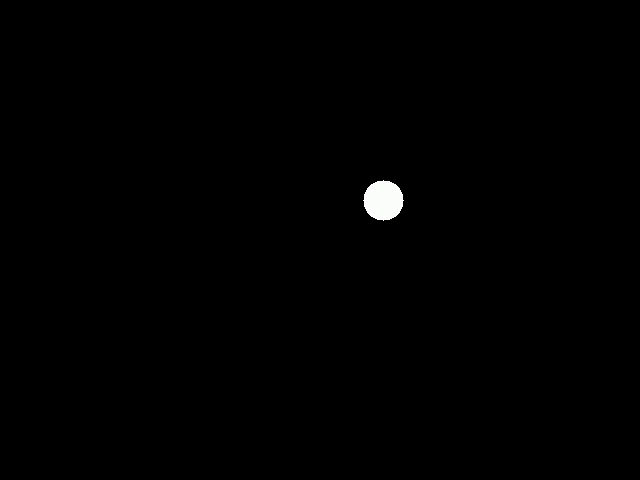

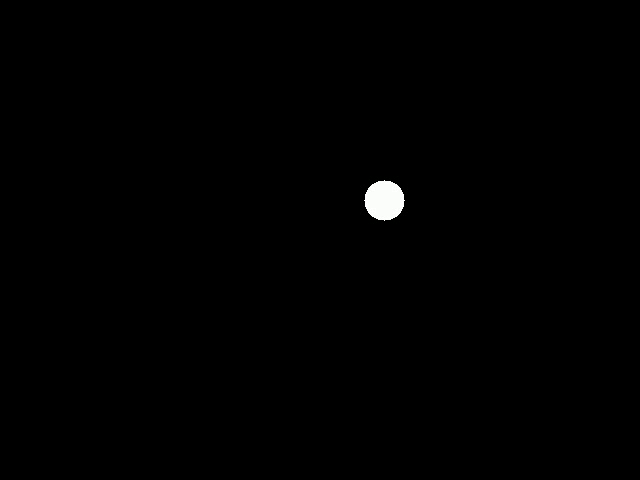

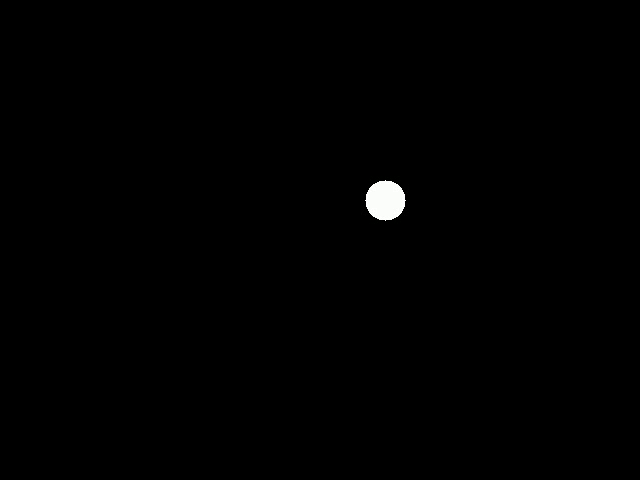

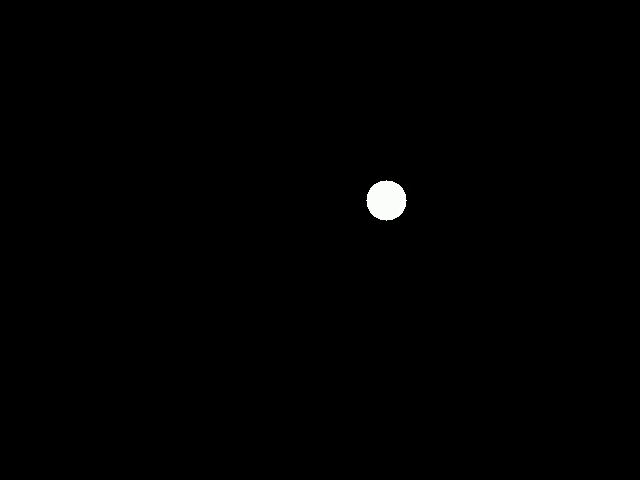

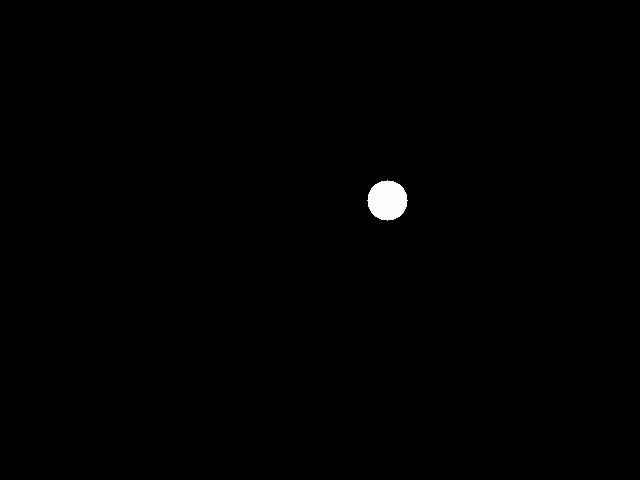

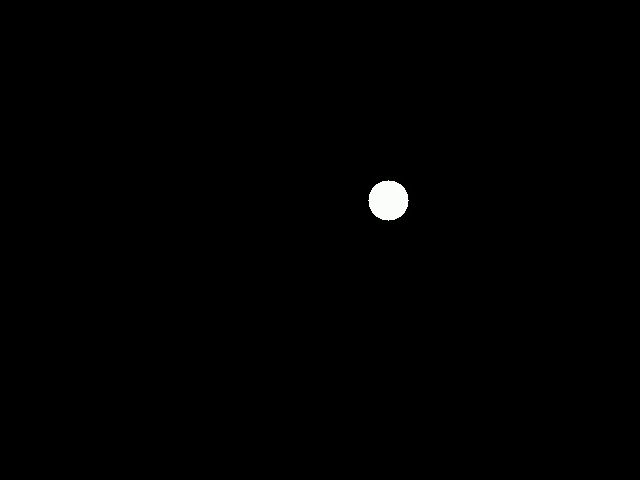

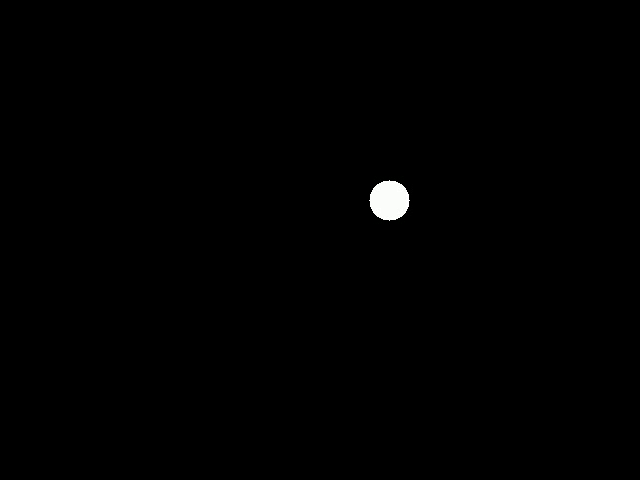

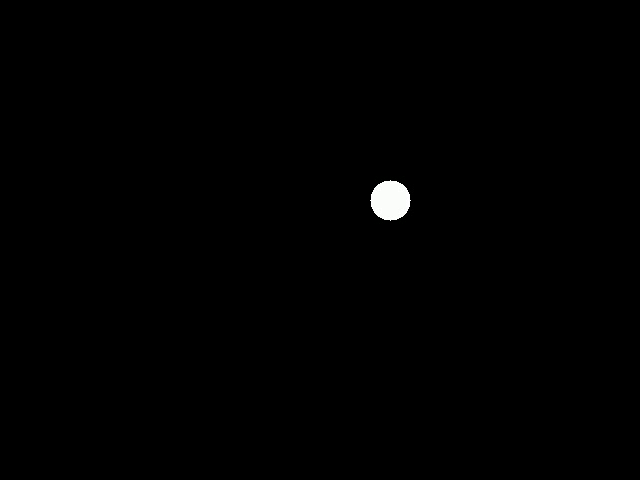

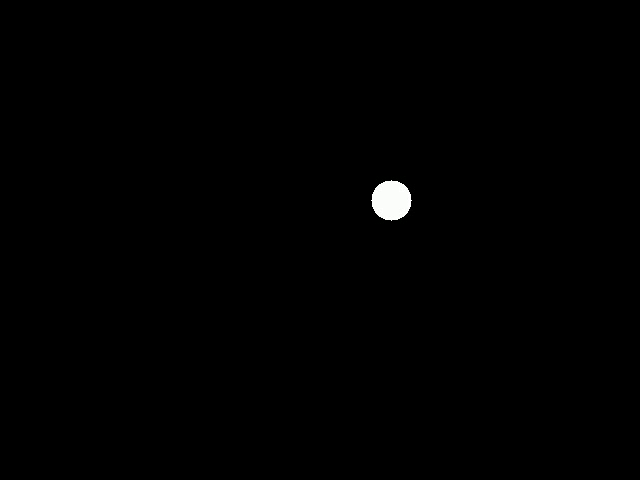

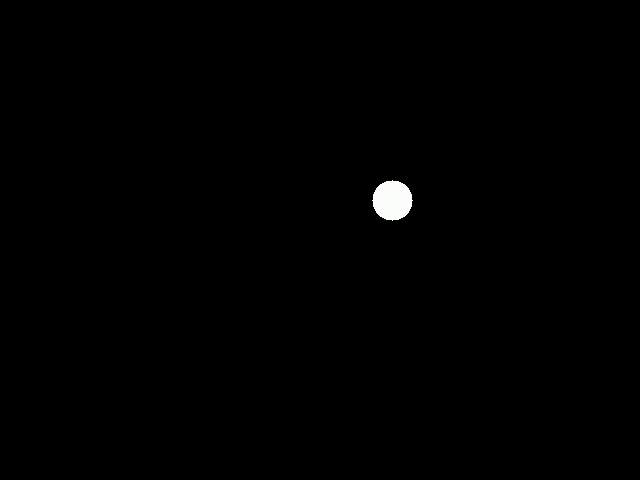

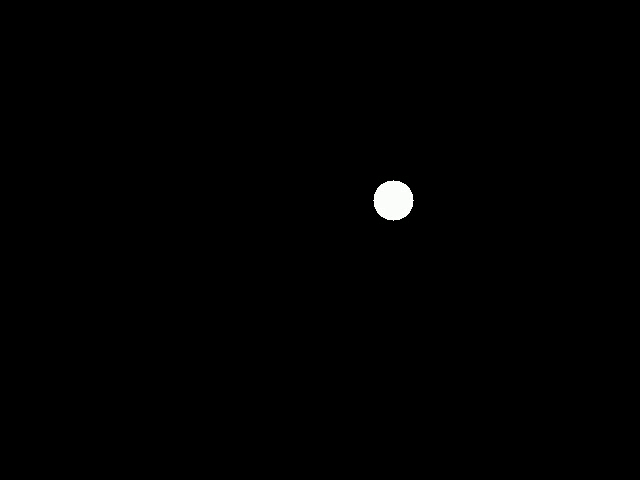

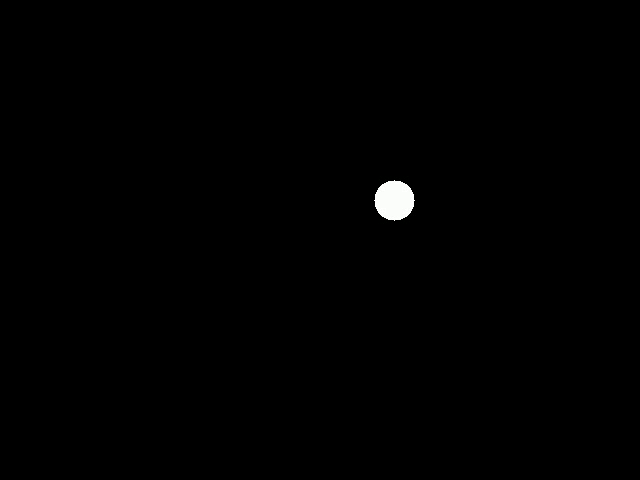

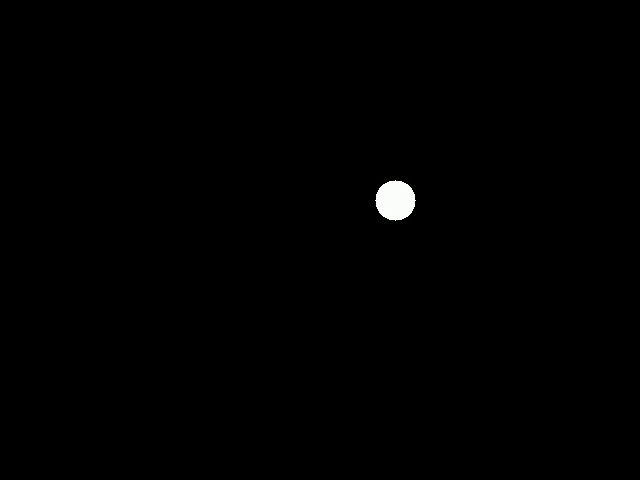

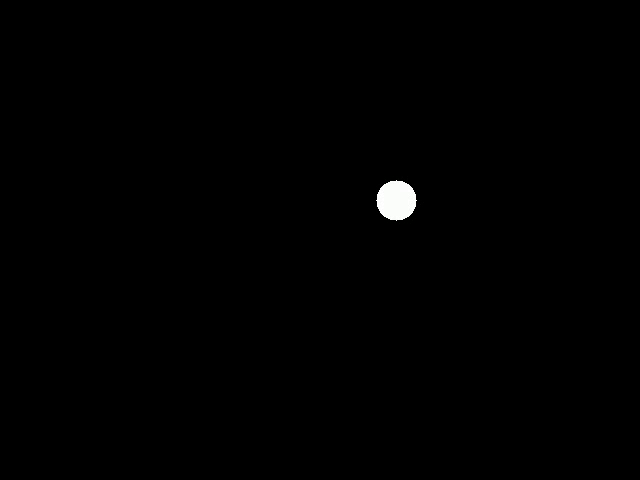

KeyboardInterrupt: 

In [13]:
import cv2
from google.colab.patches import cv2_imshow # Import the necessary function


cap = cv2.VideoCapture('out.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
      cv2_imshow(frame) # Use cv2_imshow instead of cv2.imshow to display the frame
    if cv2.waitKey(1) == ord('q') or not ret:
      break
cap.release()
cv2.destroyAllWindows()

# EP.8 - Computer Vision - Color Detection

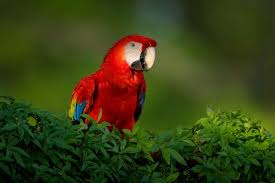

In [18]:
import cv2
from google.colab.patches import cv2_imshow

A = cv2.imread('/content/drive/MyDrive/LearningforIntern/super ai ss.5/computervision/image/parrot.jpg')

cv2_imshow(A)

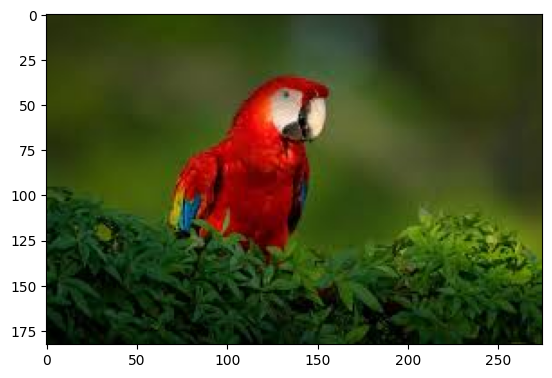

In [20]:
import matplotlib.pyplot as plt
plt.imshow(A[:,:,::-1])
plt.show()

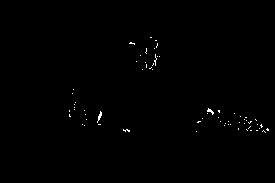

In [23]:
tol = 30
color = np.array([64,116,138])

mask = cv2.inRange(A, color-tol, color+tol)
Amask = cv2.bitwise_and(A, A, mask=mask)

cv2_imshow(mask)
# cv2_imshow(Amask)